In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Getting To Know Our Data

In [4]:
df = pd.read_csv("D:/ML Project/US_Accidents_March23.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
# missing values
df.isna().sum() 

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [8]:
 # total number of cases
print(f"Total number of cases are {df.shape[0]}")

Total number of cases are 7728394


In [9]:
unique_ids = df['ID'].nunique()
print(f"Number of unique cases (based on ID): {unique_ids}")

Number of unique cases (based on ID): 7728394


## EDA - Exploratory Data Analysis

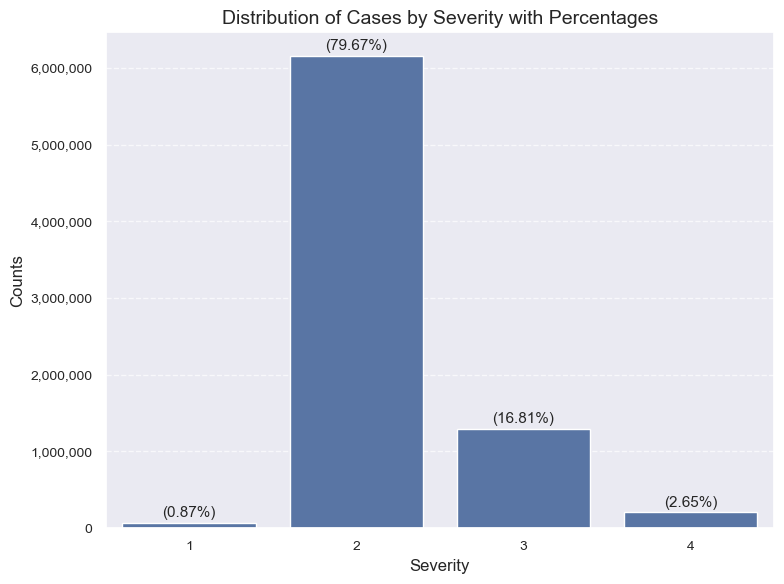

In [10]:
severity_counts = df['Severity'].value_counts().sort_index()
total_cases = df.shape[0]
severity_percentages = (severity_counts / total_cases) * 100

severity_df = pd.DataFrame({
    'Severity': severity_counts.index,
    'Counts': severity_counts.values,
    'Percentage': severity_percentages.values
})

plt.figure(figsize=(8, 6))
sns.barplot(data=severity_df, x = "Severity", y="Counts")
for i, row in severity_df.iterrows():
    plt.text(i, row['Counts'] + total_cases * 0.01,
             f"({row['Percentage']:.2f}%)", 
             ha='center', fontsize=11) 
    
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.title('Distribution of Cases by Severity with Percentages', fontsize=14)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on the above plot:
1. Severity 2 (almsot 80%) - most cases fall under this category means most cases are moderate in nature.
2. 17% cases fall under severity level 3 they are smaller percentage as comapred to severity 2 but still reflect a significant number of serious inciddents.
3. less than 1% cases fall under the severity -1 means very few cases are there that are very mild in nature.
4. 2.65% of the cases are very critical in nature which are rare but still require significant attention and more insights can be found with further analysis

The dataset maybe biased towards severity 2 but it is also possible that most cases fall under this category,and preventing such cases is possible with improving safety plans and infrastrcuture. Severity 1 maybe rare and may not be reported as often.

In [11]:
df.groupby(["City", "Severity"]).size()

City        Severity
Aaronsburg  2            19
            3             2
Abbeville   1             4
            2           589
            3             2
                       ... 
Zuni        2            52
            3             1
            4            15
Zwingle     2            10
            4             4
Length: 34311, dtype: int64

In [12]:
grouped_data = df.groupby(["City", 'Severity']).size().reset_index(name='Counts')
grouped_data.groupby("City")['Counts'].transform("sum")

0         21
1         21
2        604
3        604
4        604
        ... 
34306     68
34307     68
34308     68
34309     14
34310     14
Name: Counts, Length: 34311, dtype: int64

In [13]:
grouped_data.pivot(index="City", columns='Severity', values='Counts').fillna(0)

Severity,1,2,3,4
City,,,,
Aaronsburg,0.0,19.0,2.0,0.0
Abbeville,4.0,589.0,2.0,9.0
Abbotsford,0.0,13.0,2.0,6.0
Abbott,0.0,3.0,29.0,1.0
Abbottstown,0.0,103.0,0.0,15.0
...,...,...,...,...
Zortman,0.0,10.0,0.0,2.0
Zumbro Falls,1.0,68.0,0.0,5.0
Zumbrota,2.0,519.0,7.0,10.0


In [14]:
def plot_severity_distribution(data, group_by_column, figsize=(12, 8), top_n=None):
    
    # grouping the data by column
    grouped_data = data.groupby([group_by_column, 'Severity']).size().reset_index(name='Counts')
    
    # total number of cases for each group_by_column
    total_counts_per_group = grouped_data.groupby(group_by_column)['Counts'].transform('sum')
    
    # calculate percentage for each severity level
    grouped_data['Percentage'] = (grouped_data['Counts'] / total_counts_per_group) * 100
    
    # include only the top N groups based on total counts 
    if top_n:
        top_groups = grouped_data.groupby(group_by_column)['Counts'].sum().nlargest(top_n).index
        grouped_data = grouped_data[grouped_data[group_by_column].isin(top_groups)]

    # pivoting the data for plotting
    pivot_counts = grouped_data.pivot(index=group_by_column, columns='Severity', values='Counts').fillna(0)
    pivot_percentages = grouped_data.pivot(index=group_by_column, columns='Severity', values='Percentage').fillna(0)

    # sorting rows in descending order by the total number of cases
    pivot_counts['Total'] = pivot_counts.sum(axis=1)
    pivot_counts = pivot_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

    # plotting 
    ax = pivot_counts.plot(
        kind='bar', 
        stacked=True, 
        colormap='viridis', 
        figsize=figsize, 
        width=0.8
    )
    
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
    plt.title(f'Number of Cases by Severity and {group_by_column}', fontsize=16)
    plt.xlabel(group_by_column, fontsize=12)
    plt.ylabel('Number of Cases', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend(title='Severity Level', fontsize=10)
    plt.tight_layout()
    plt.show() 

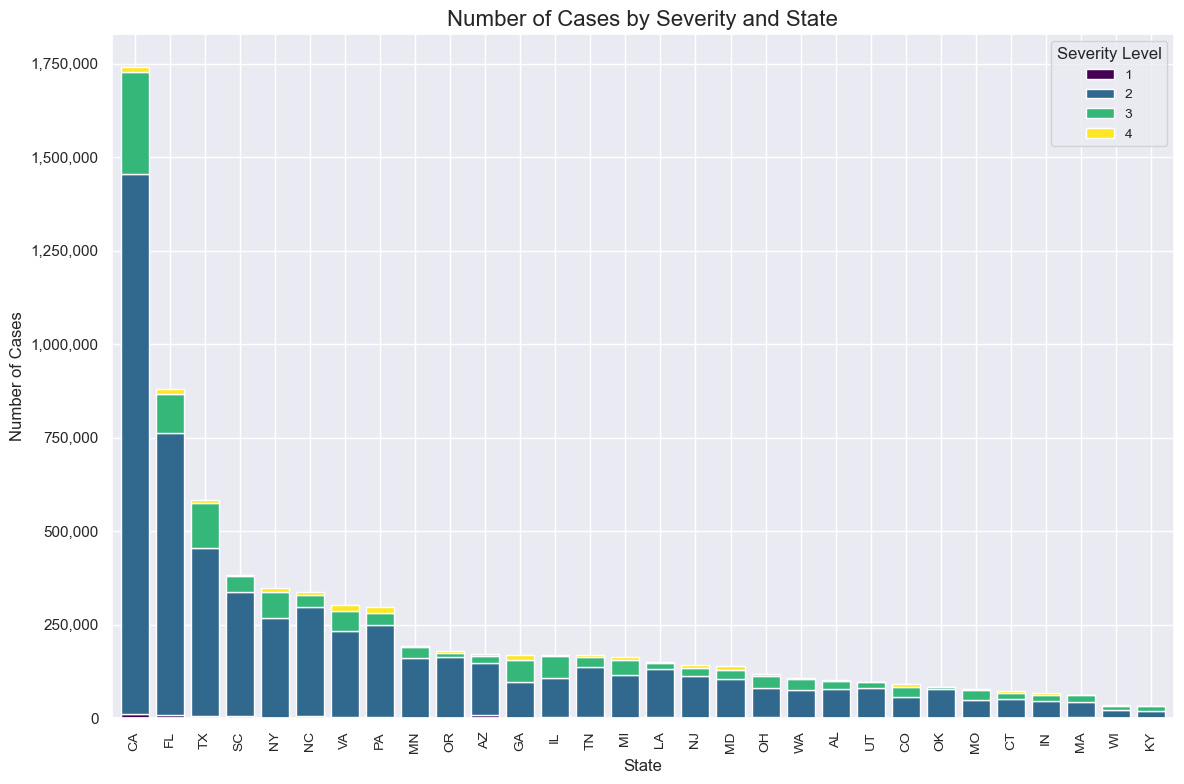

In [15]:
plot_severity_distribution(df, group_by_column='State', top_n=30);

Majority of the cases are happening in CA, FL,TX 

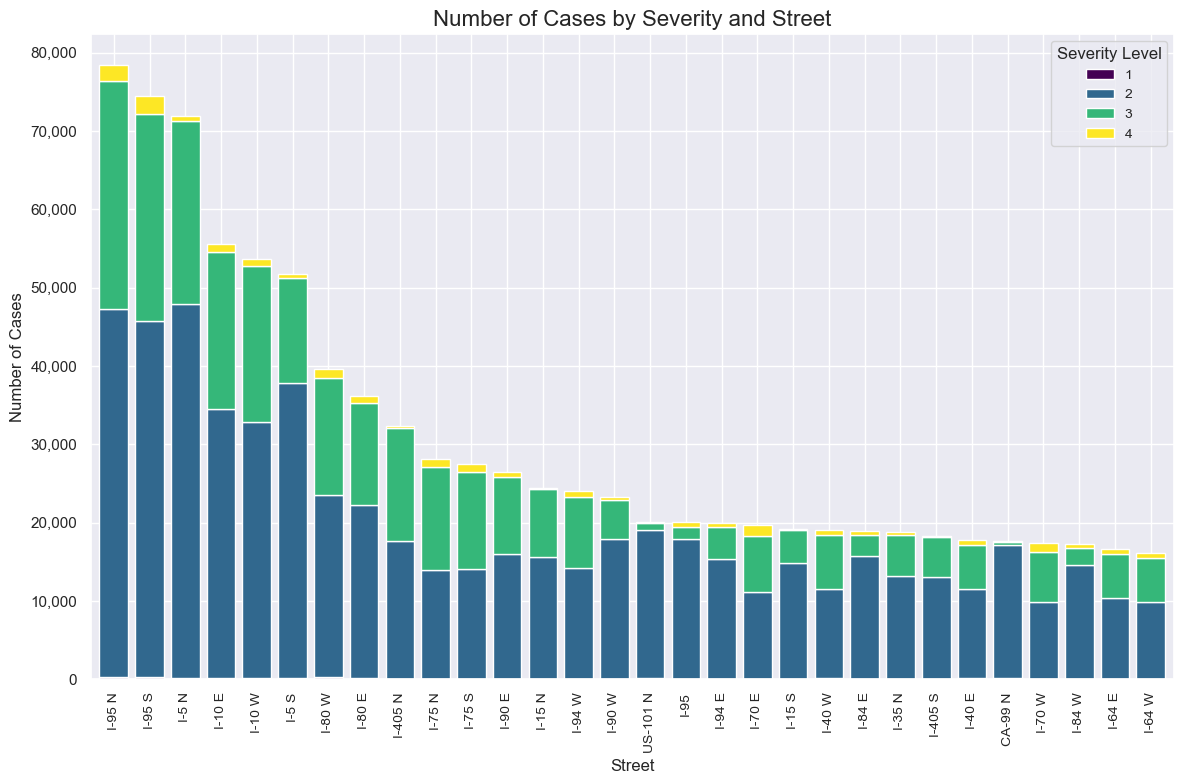

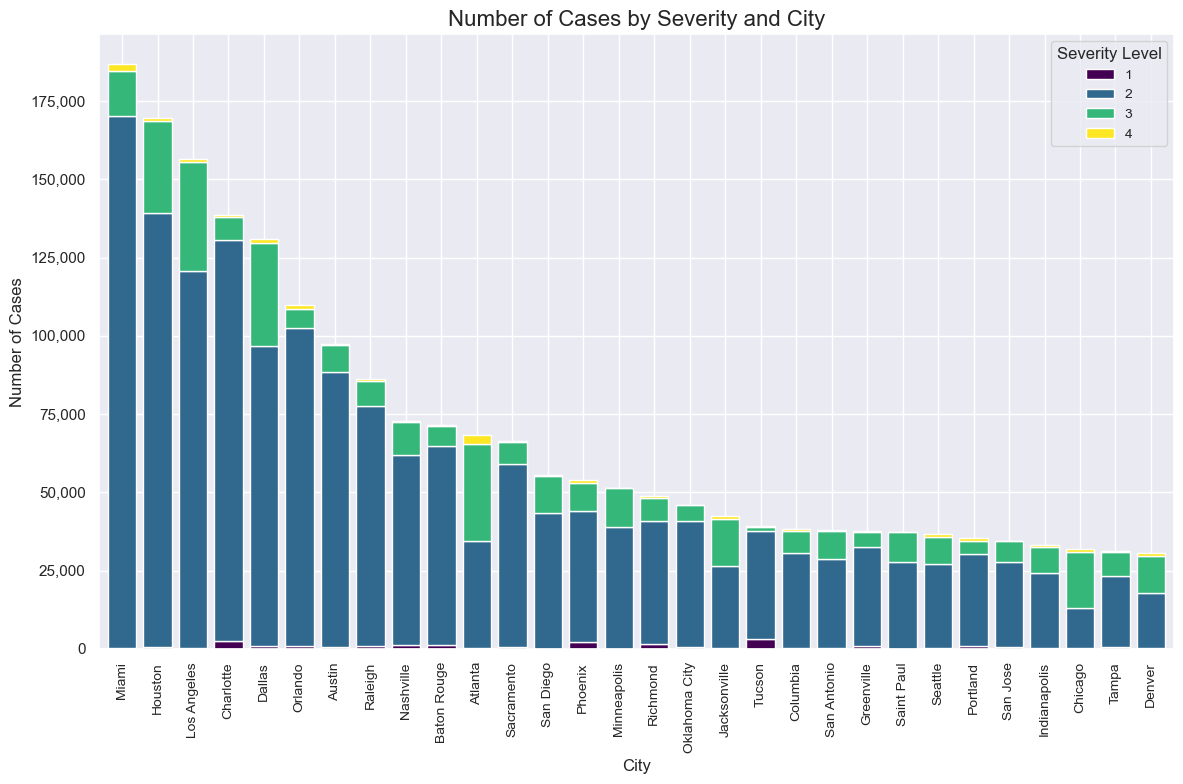

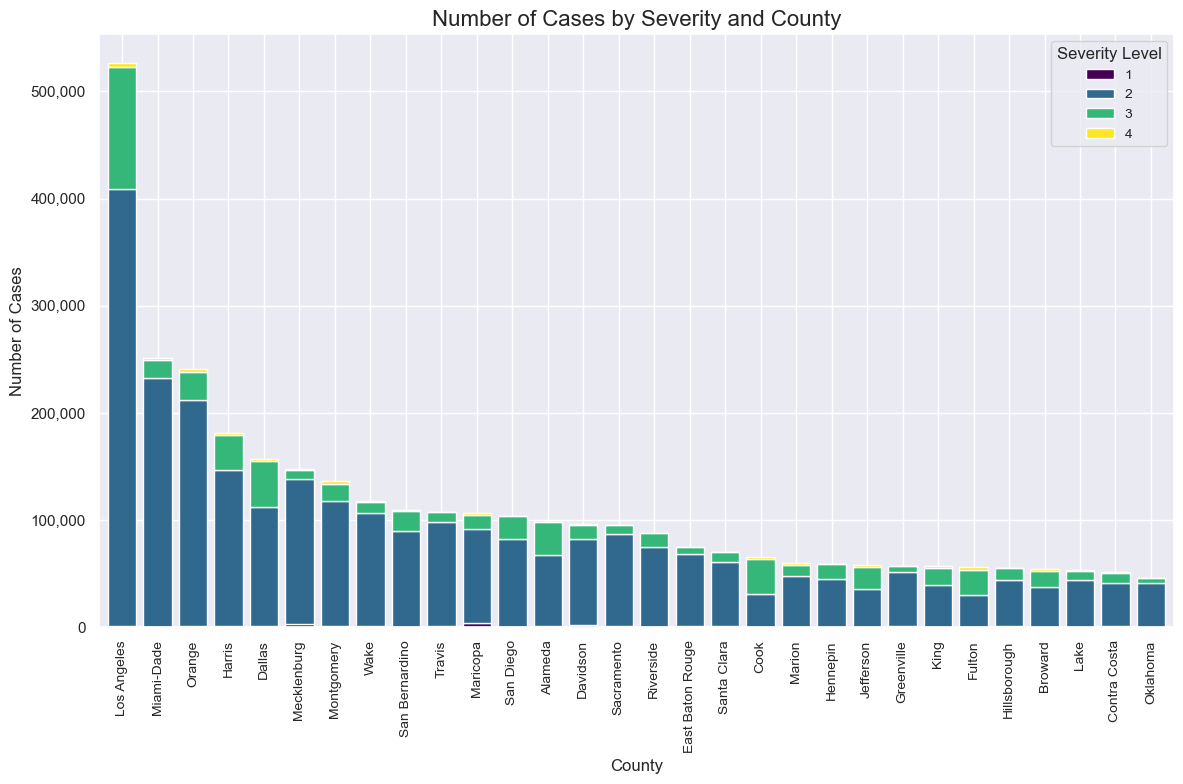

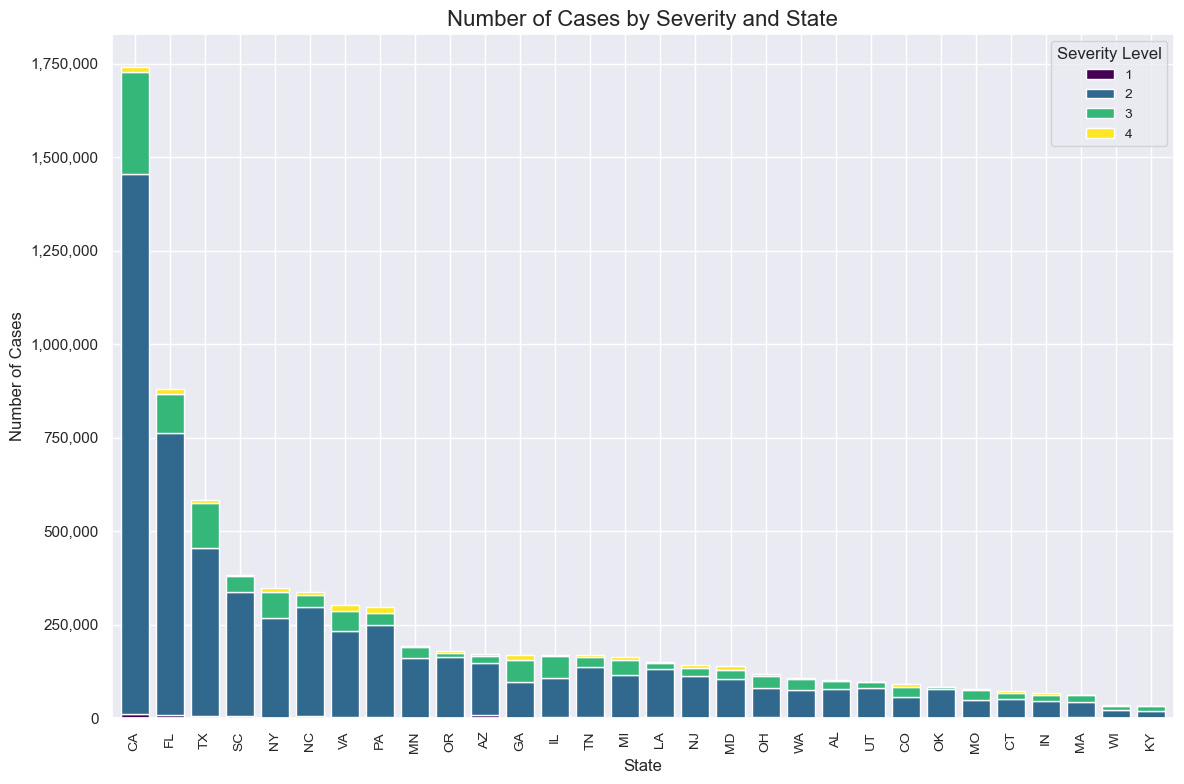

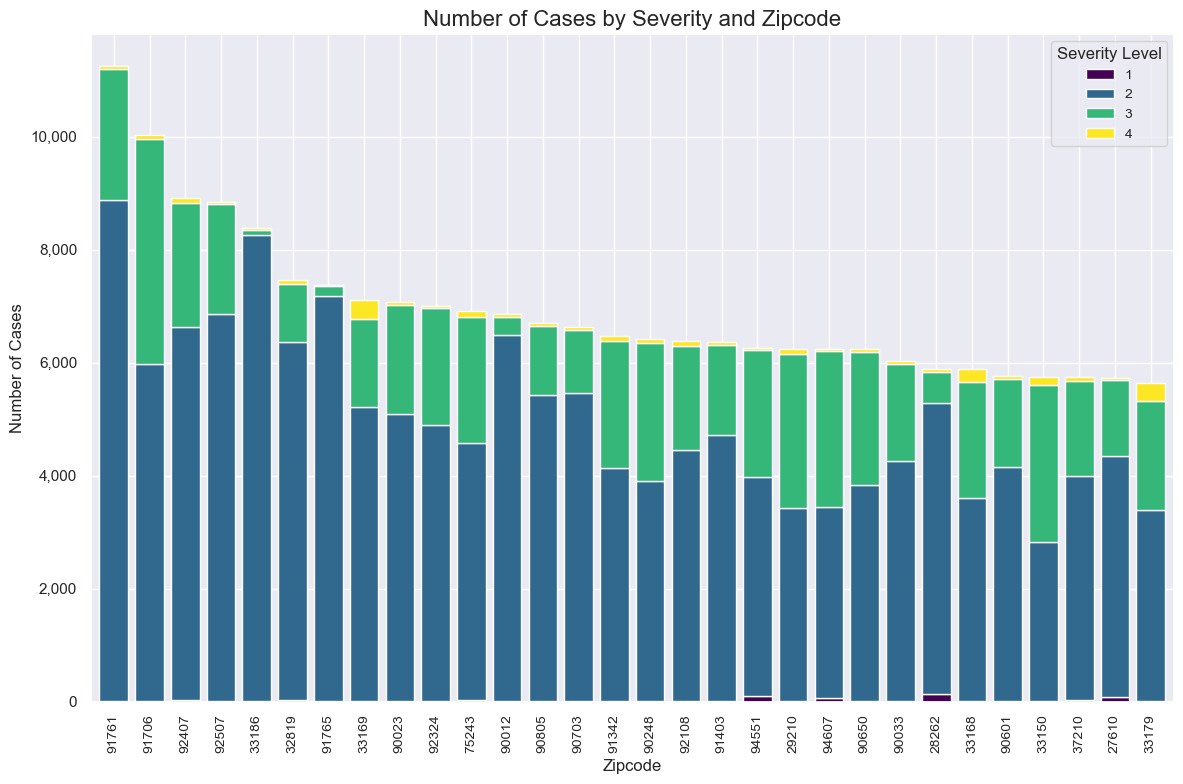

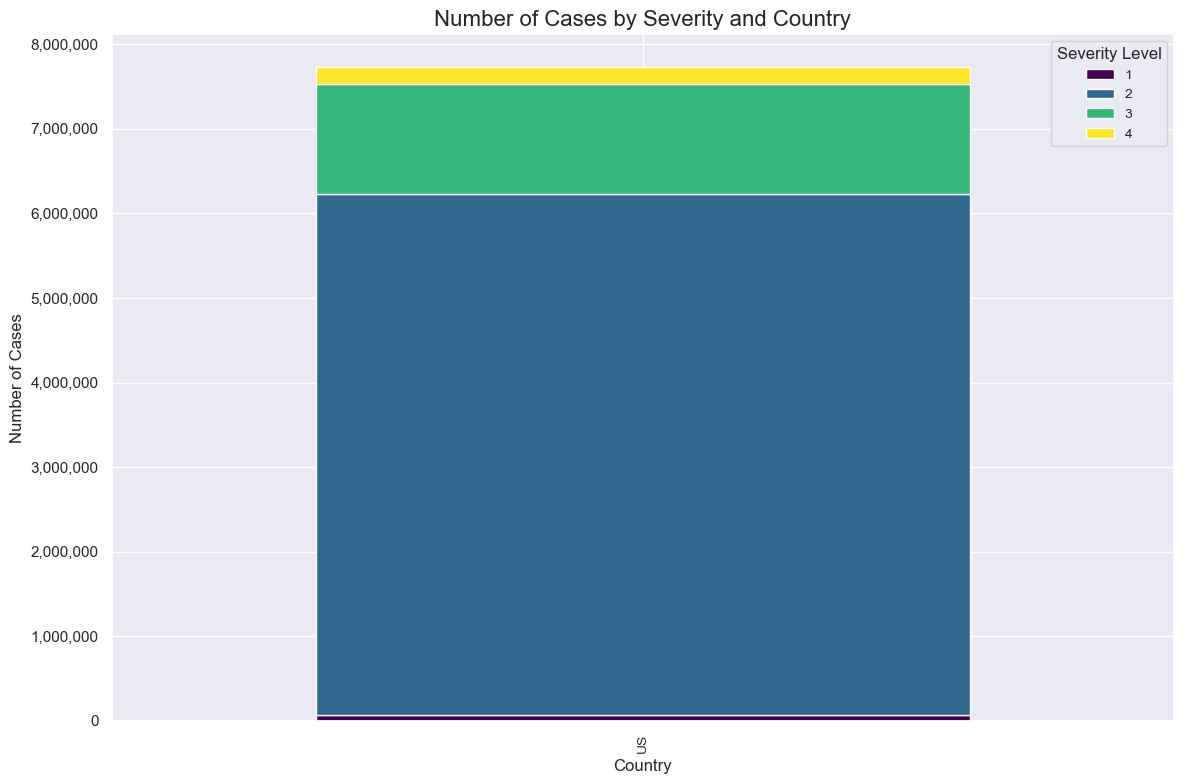

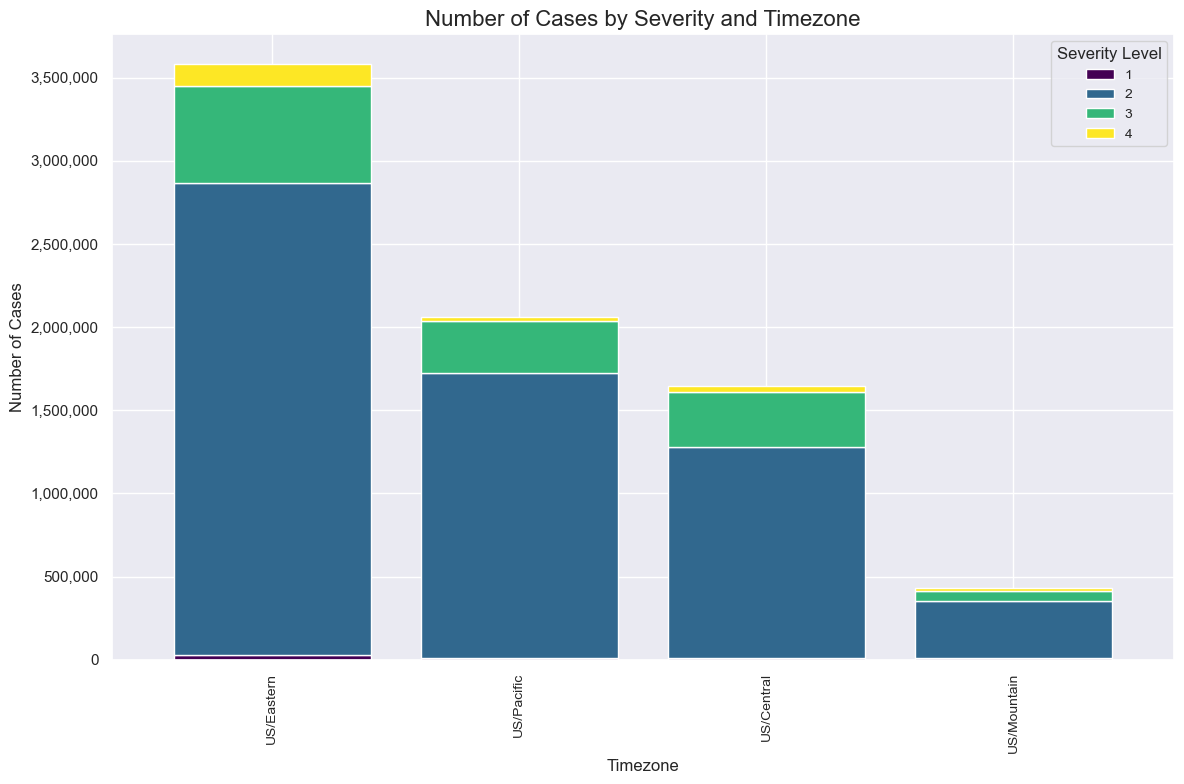

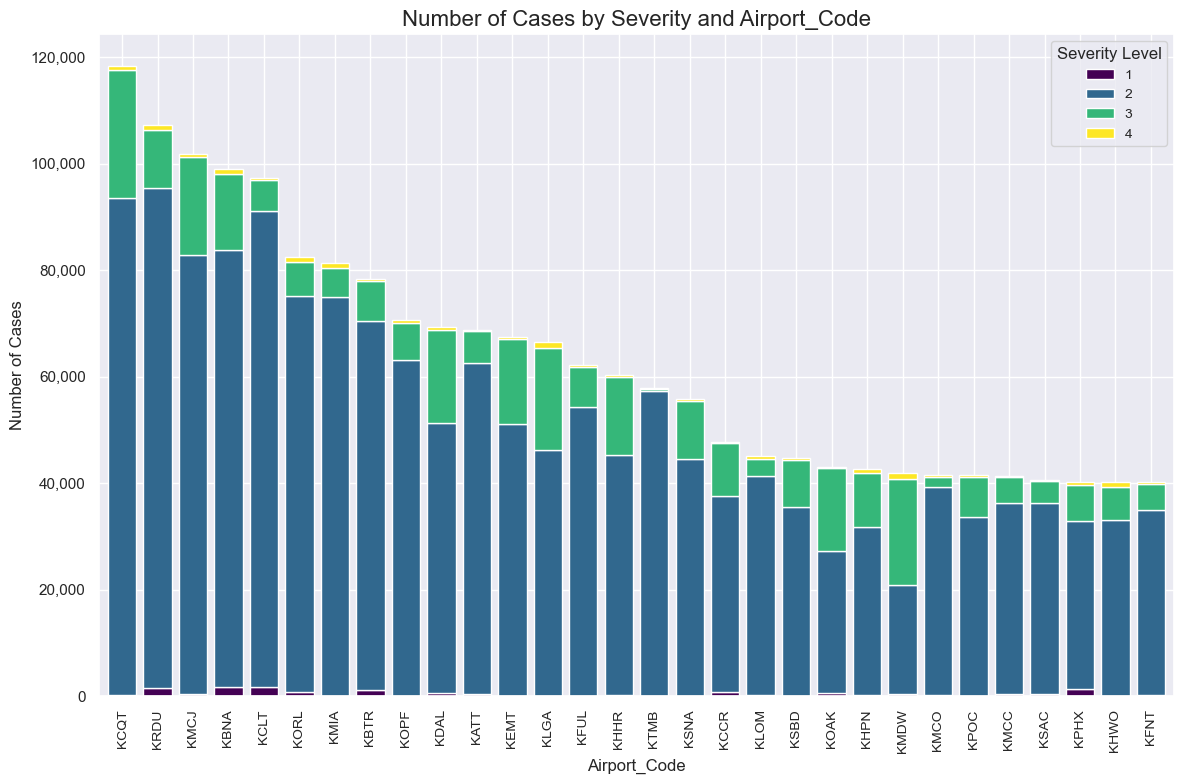

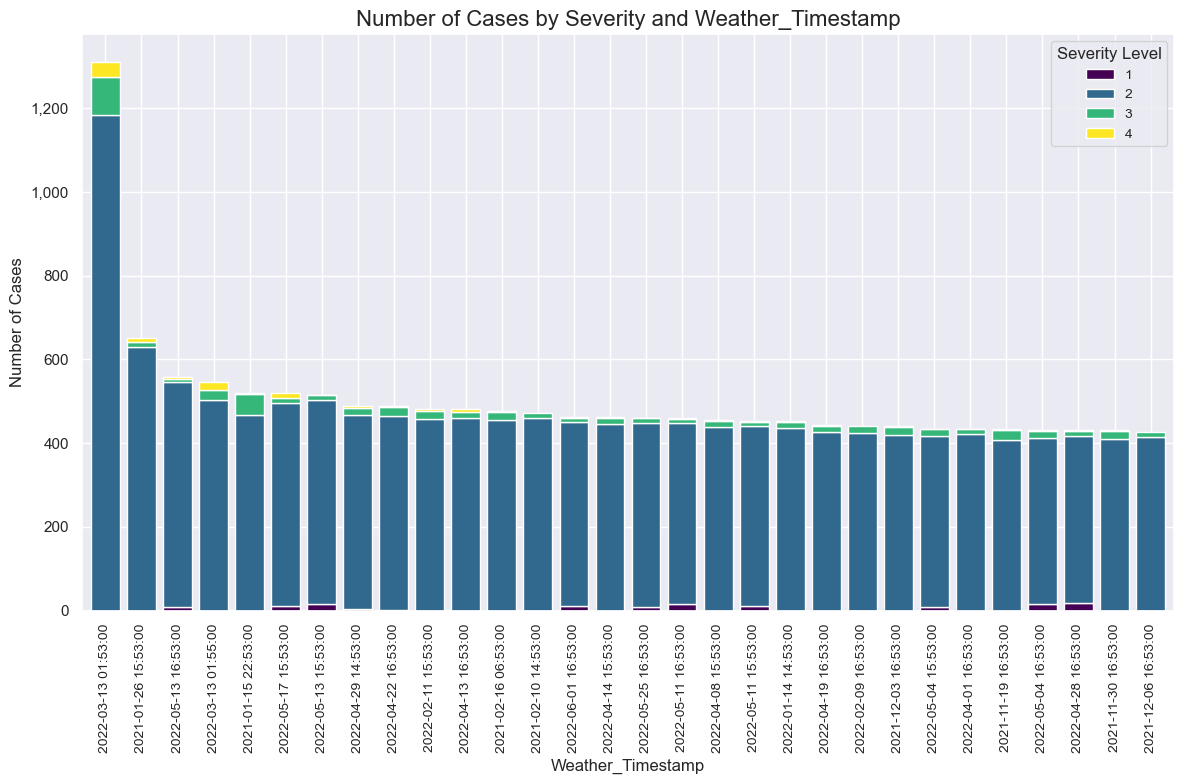

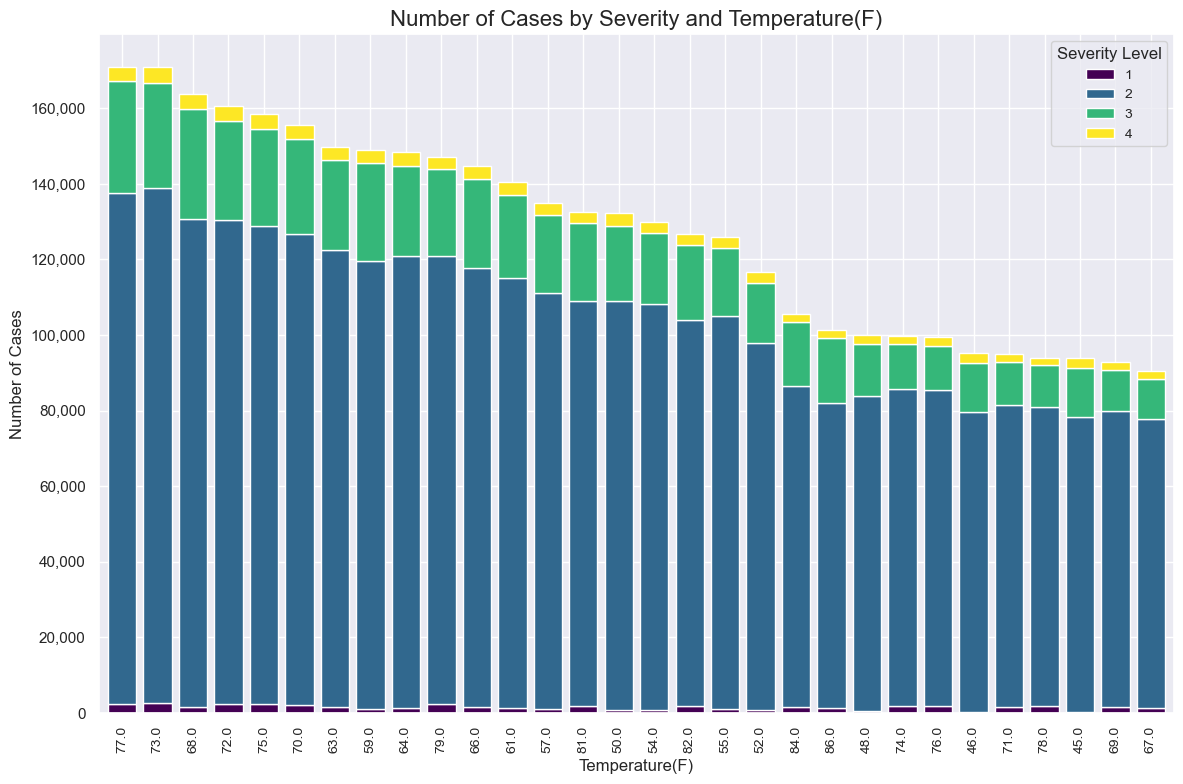

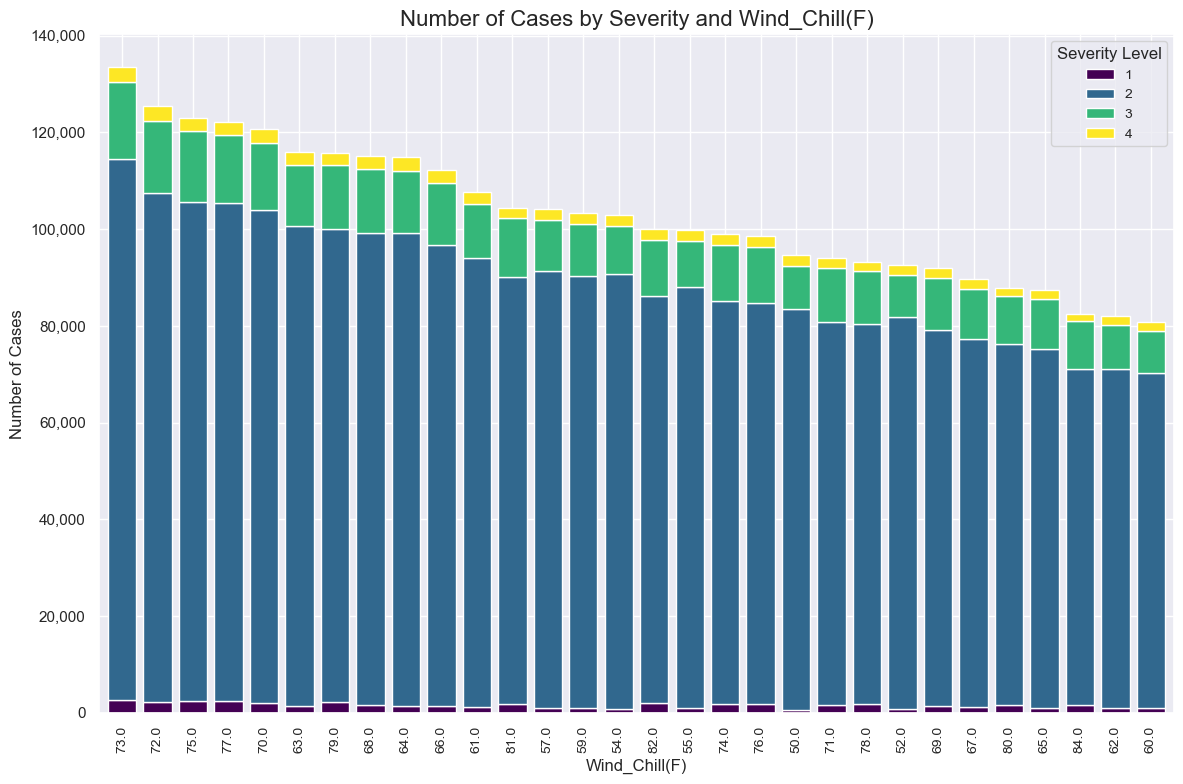

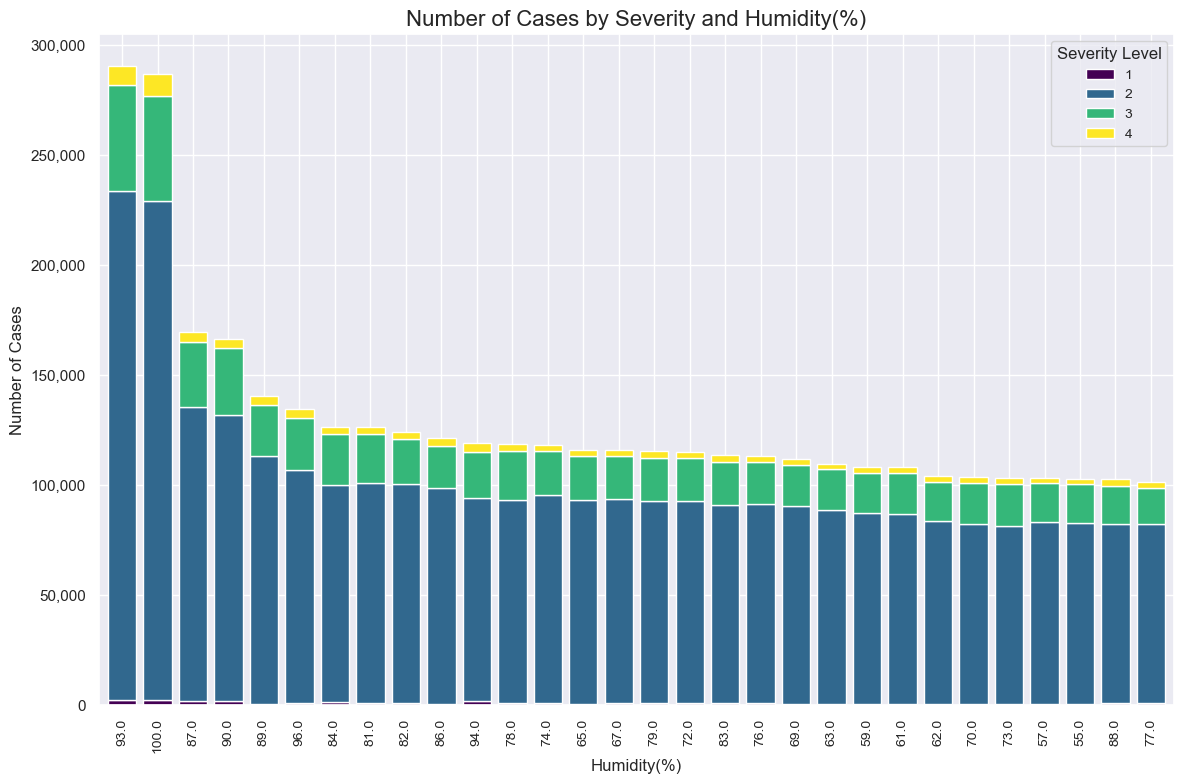

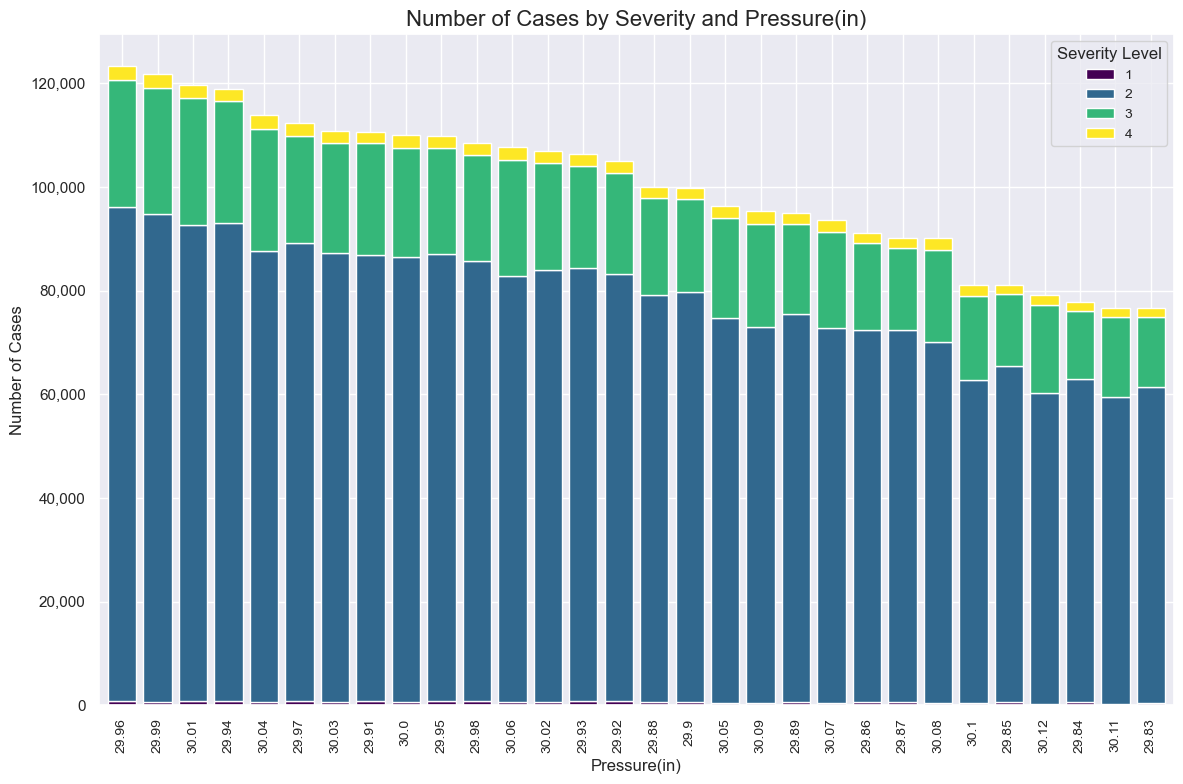

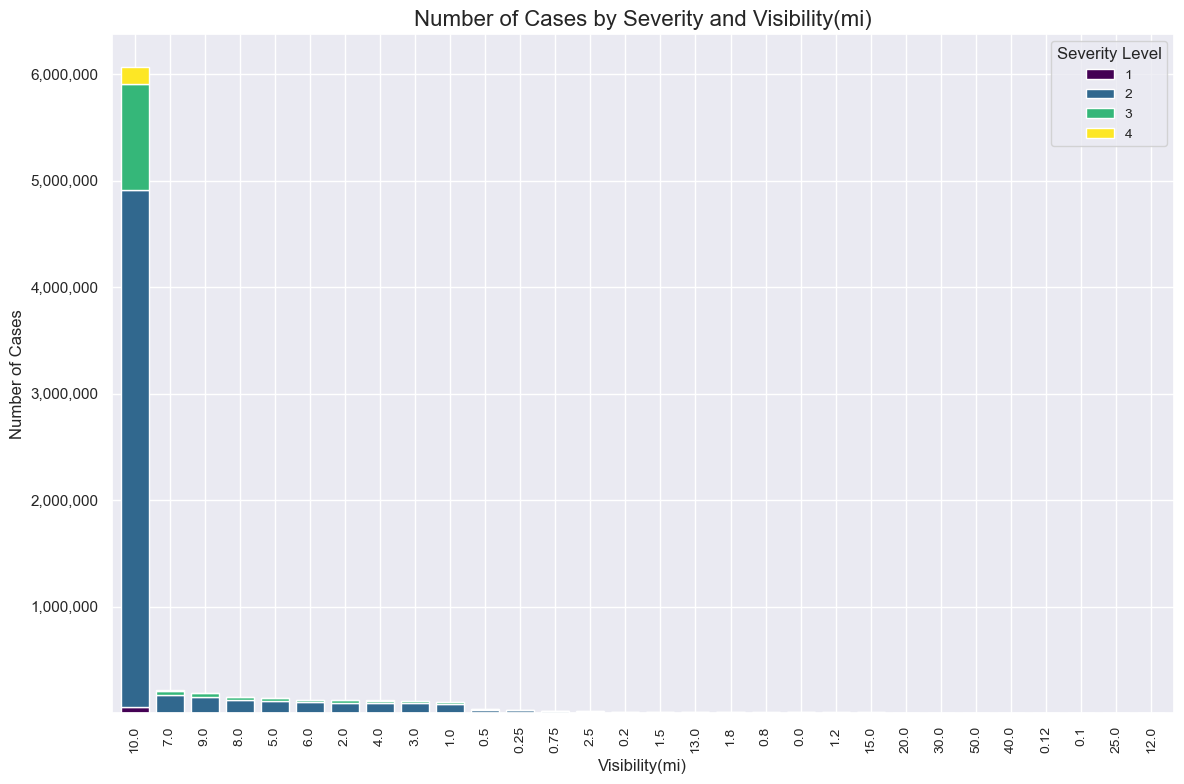

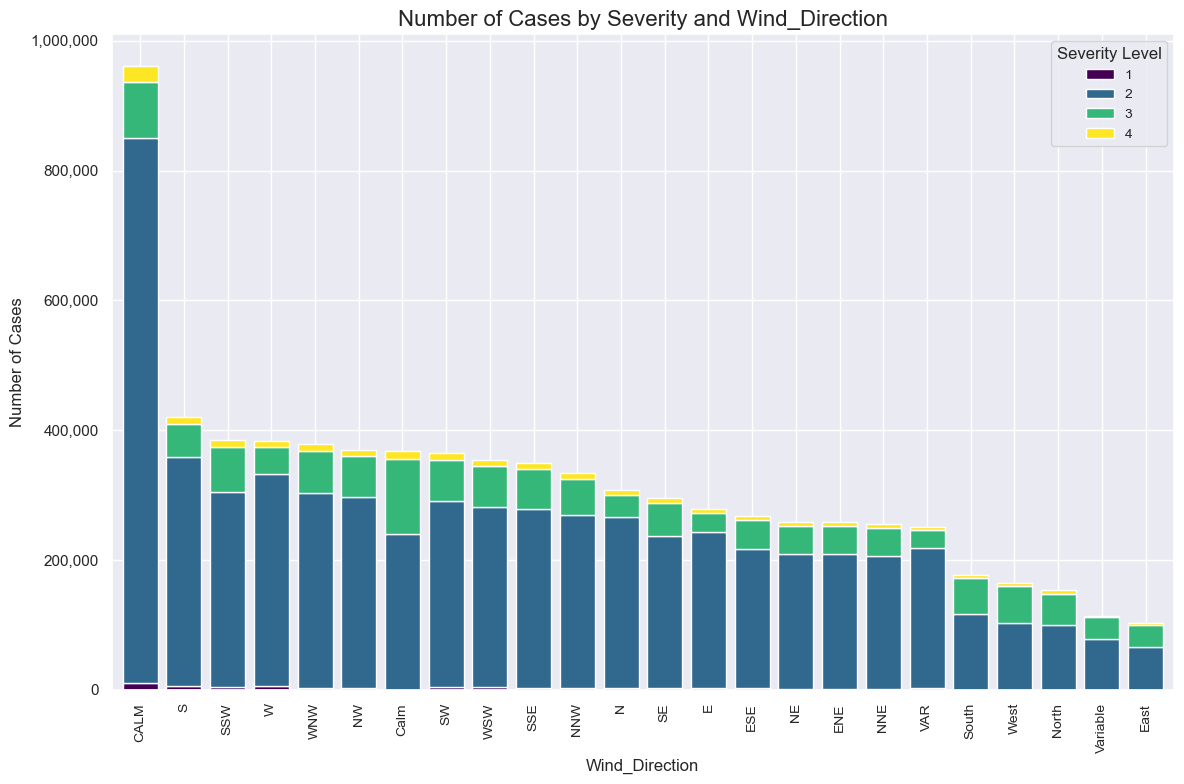

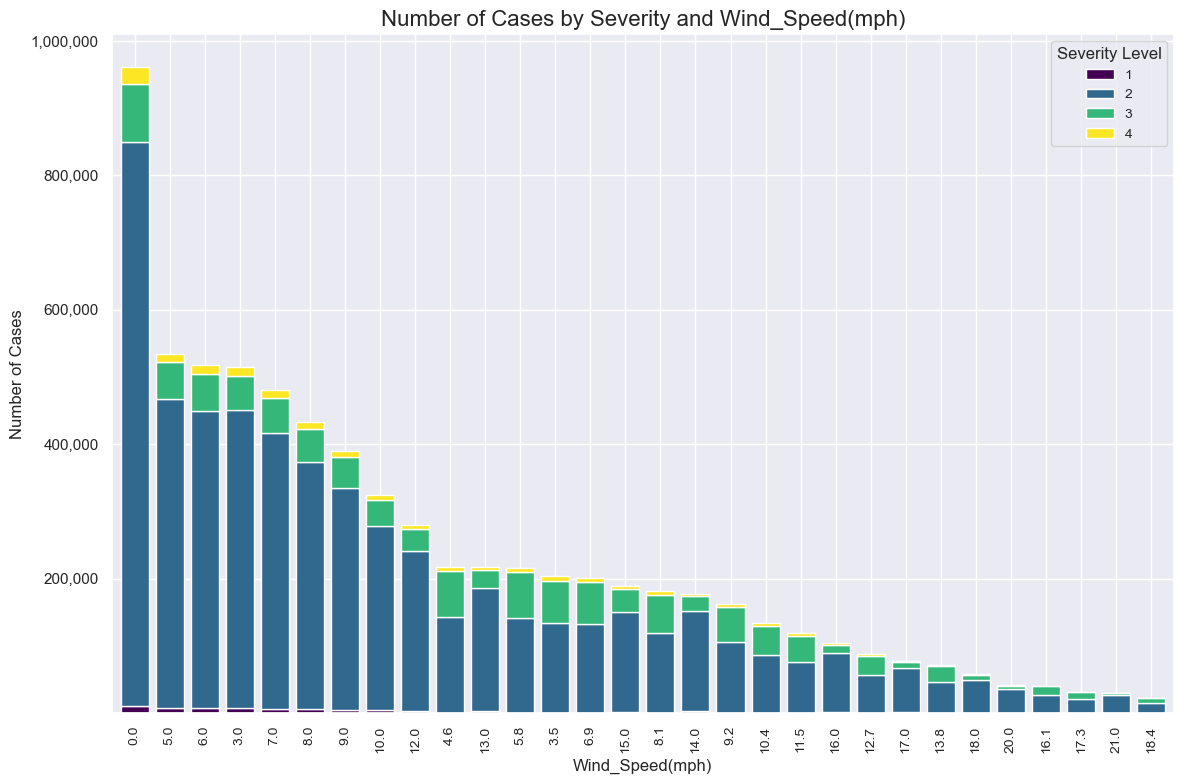

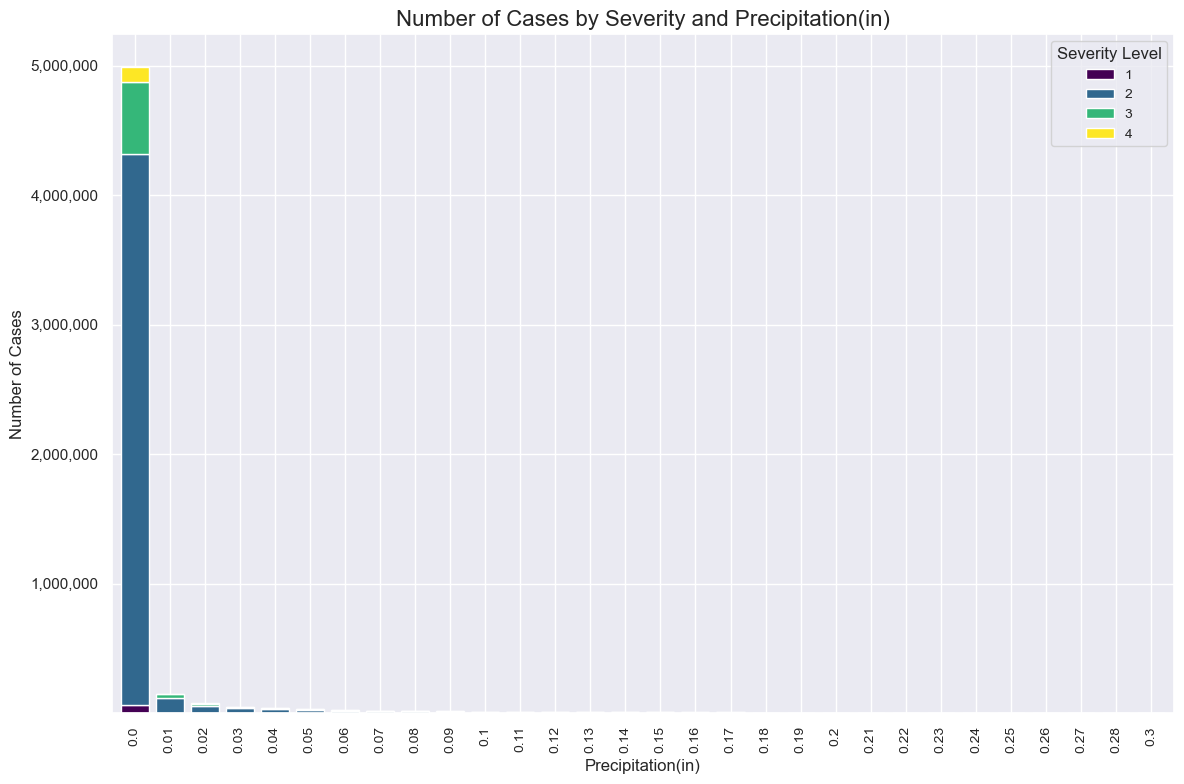

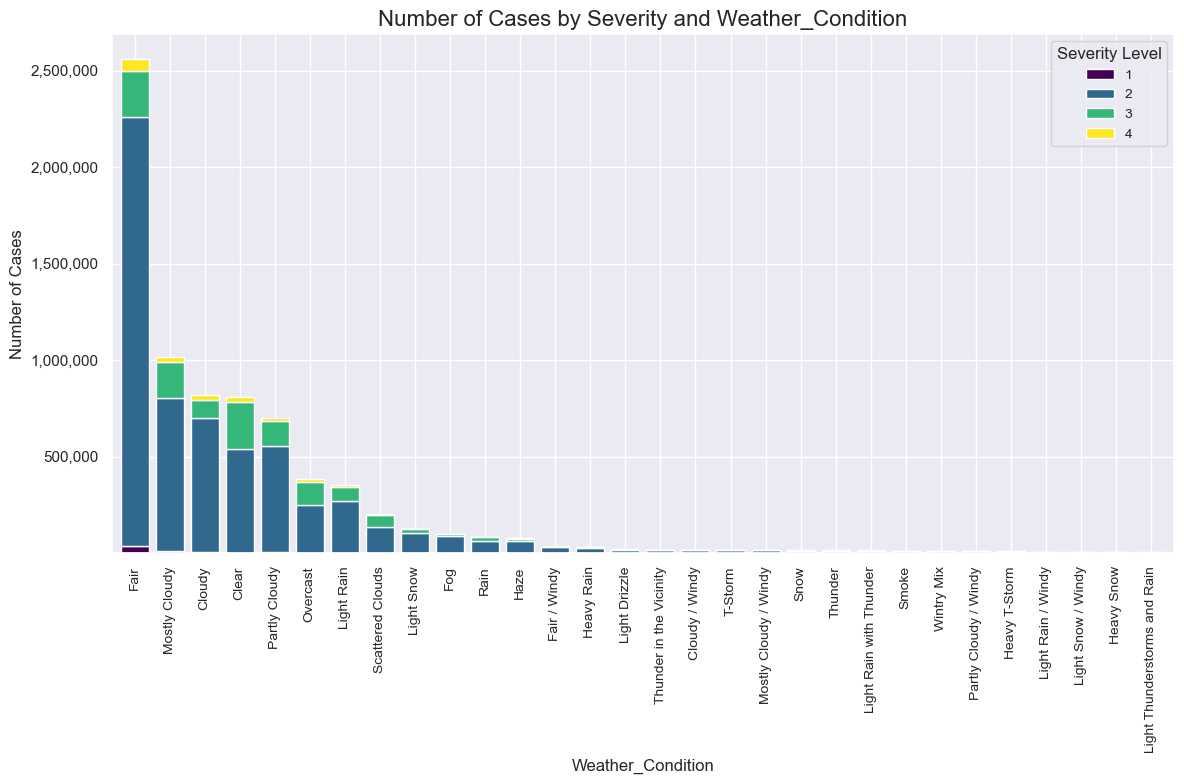

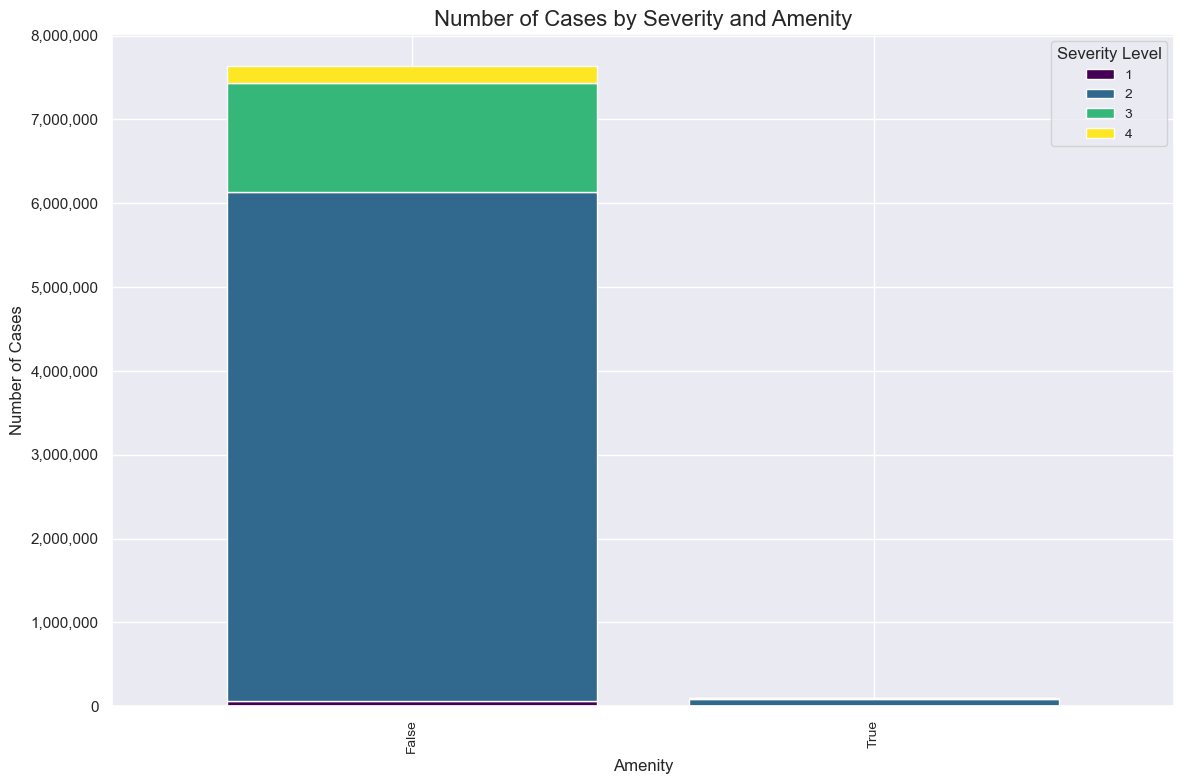

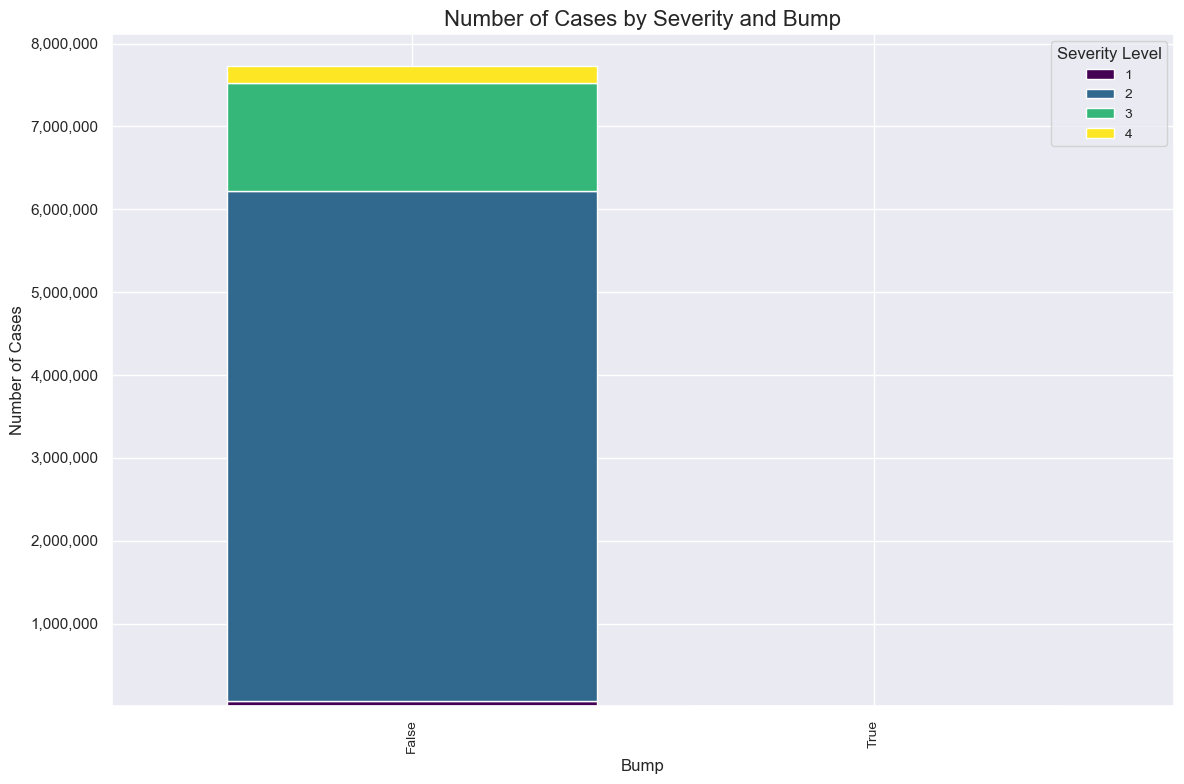

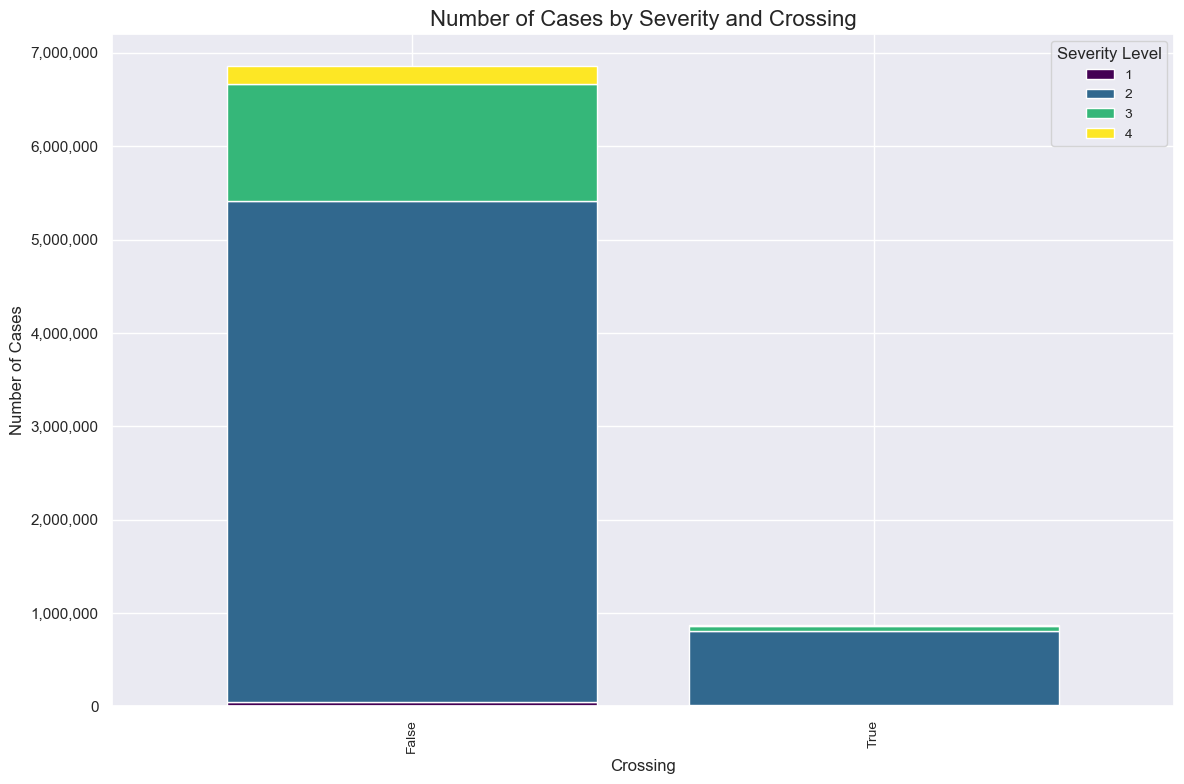

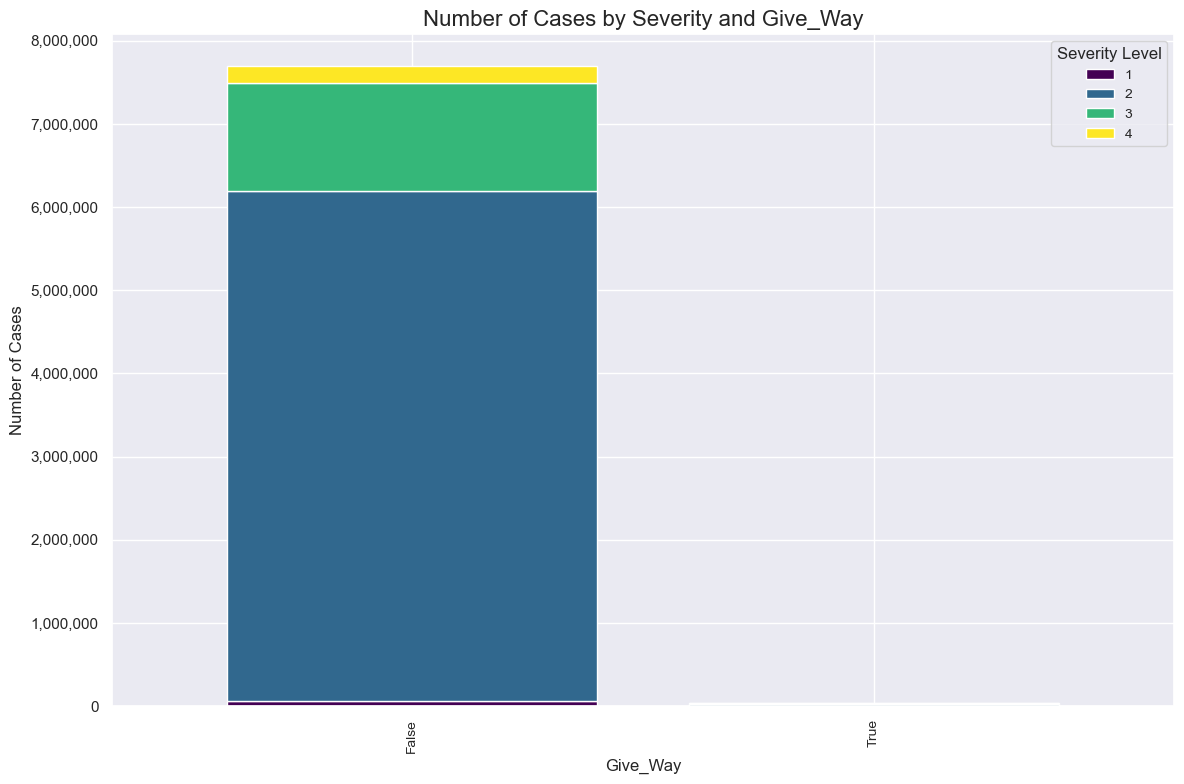

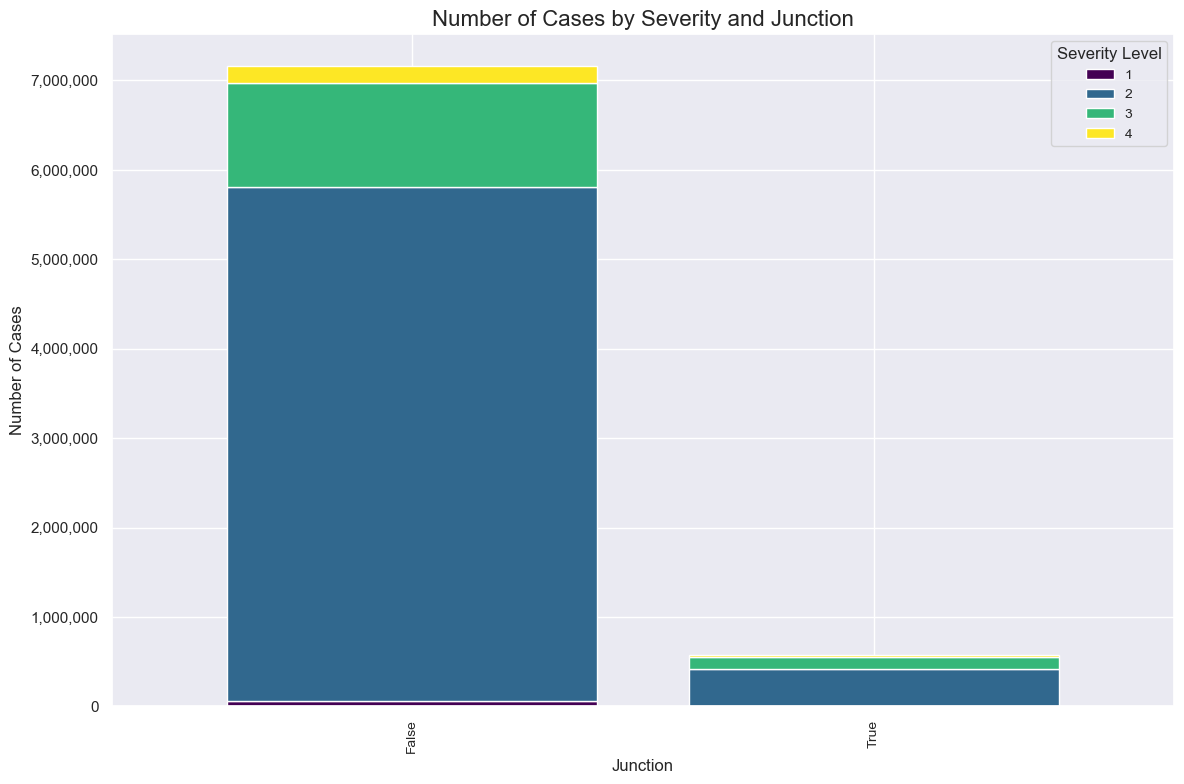

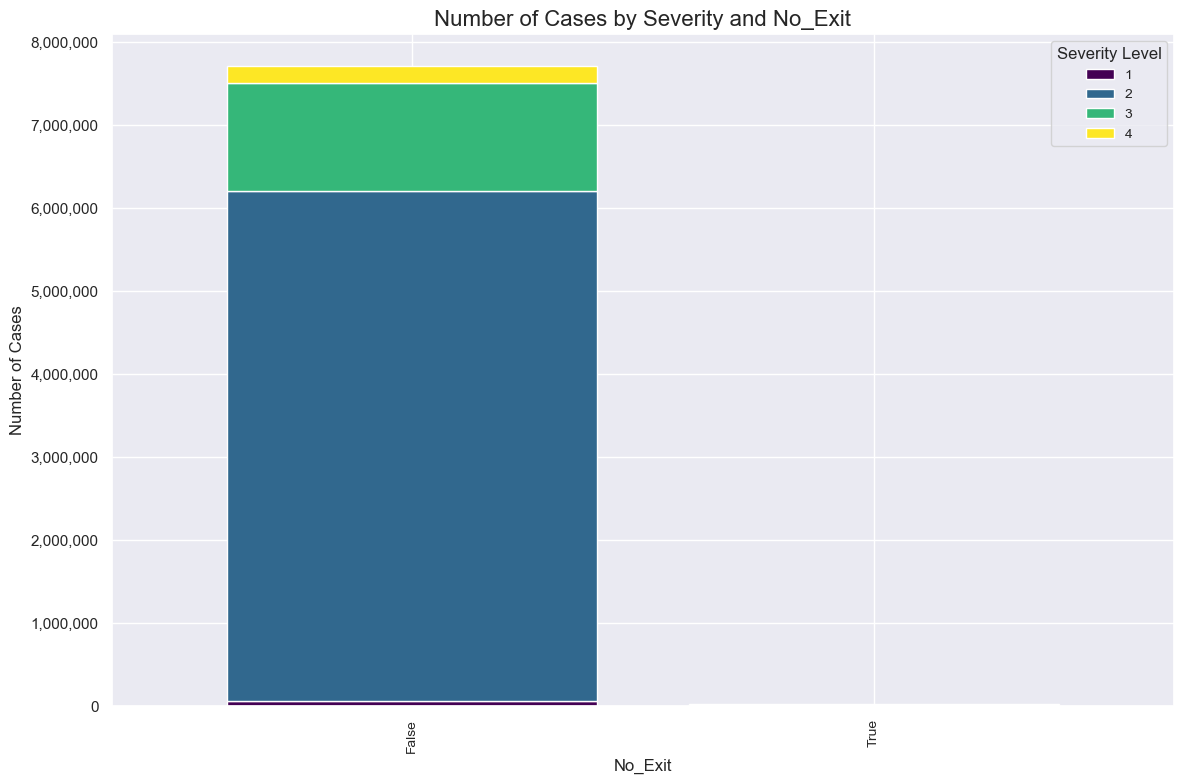

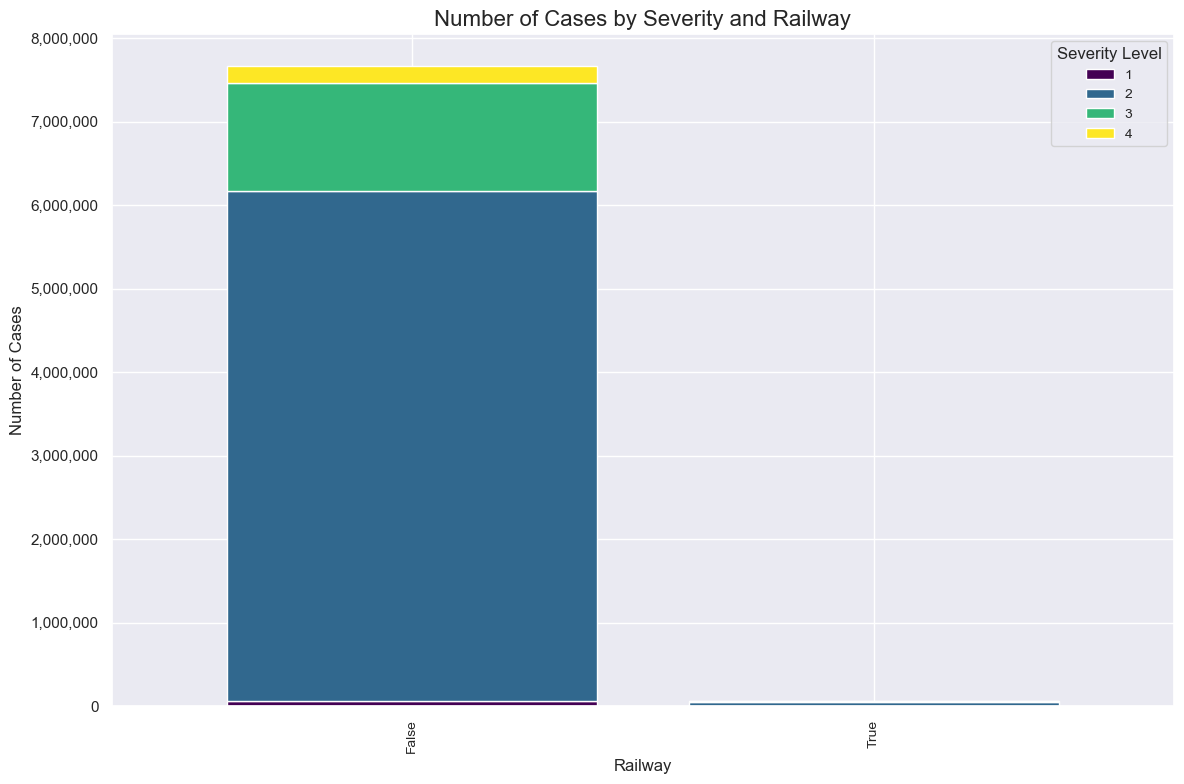

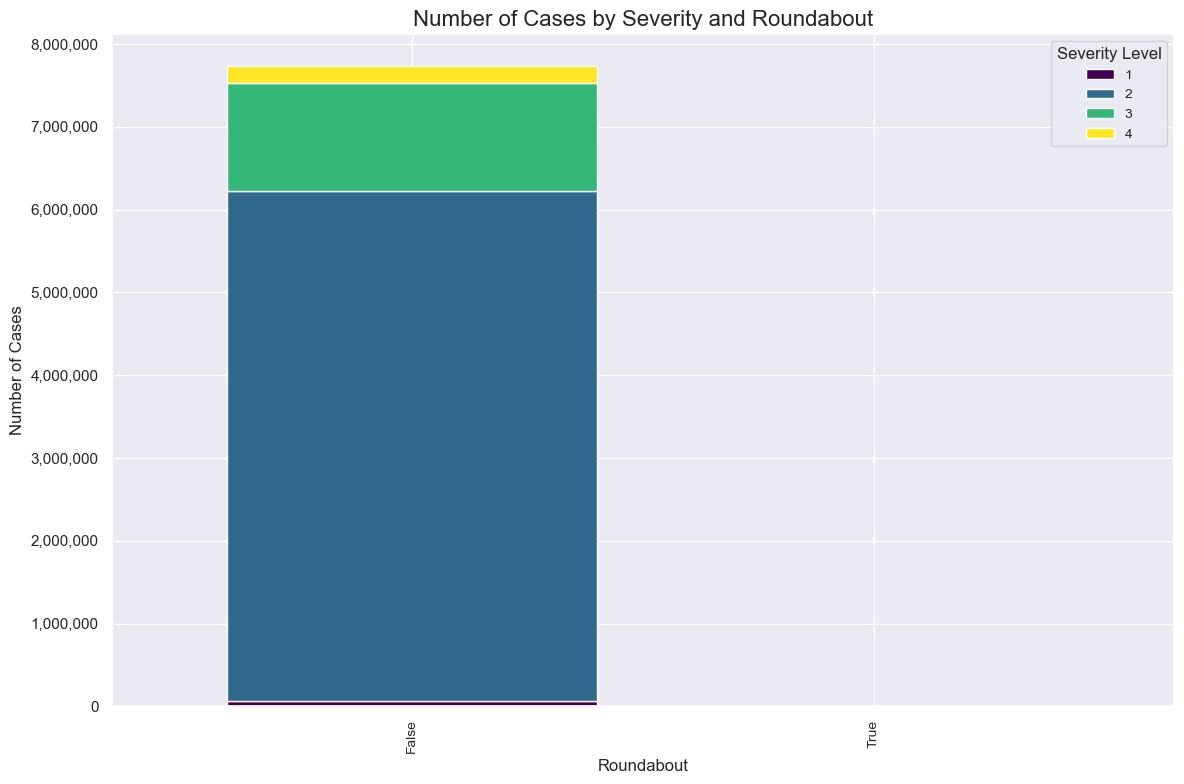

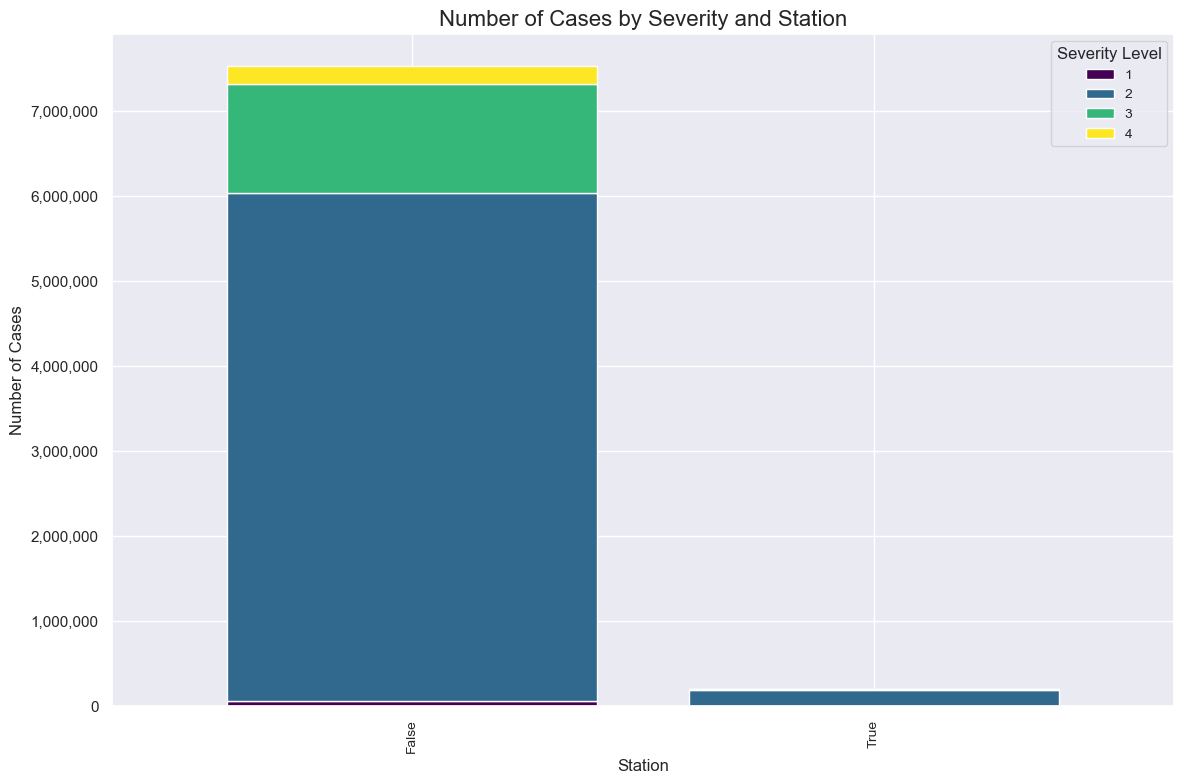

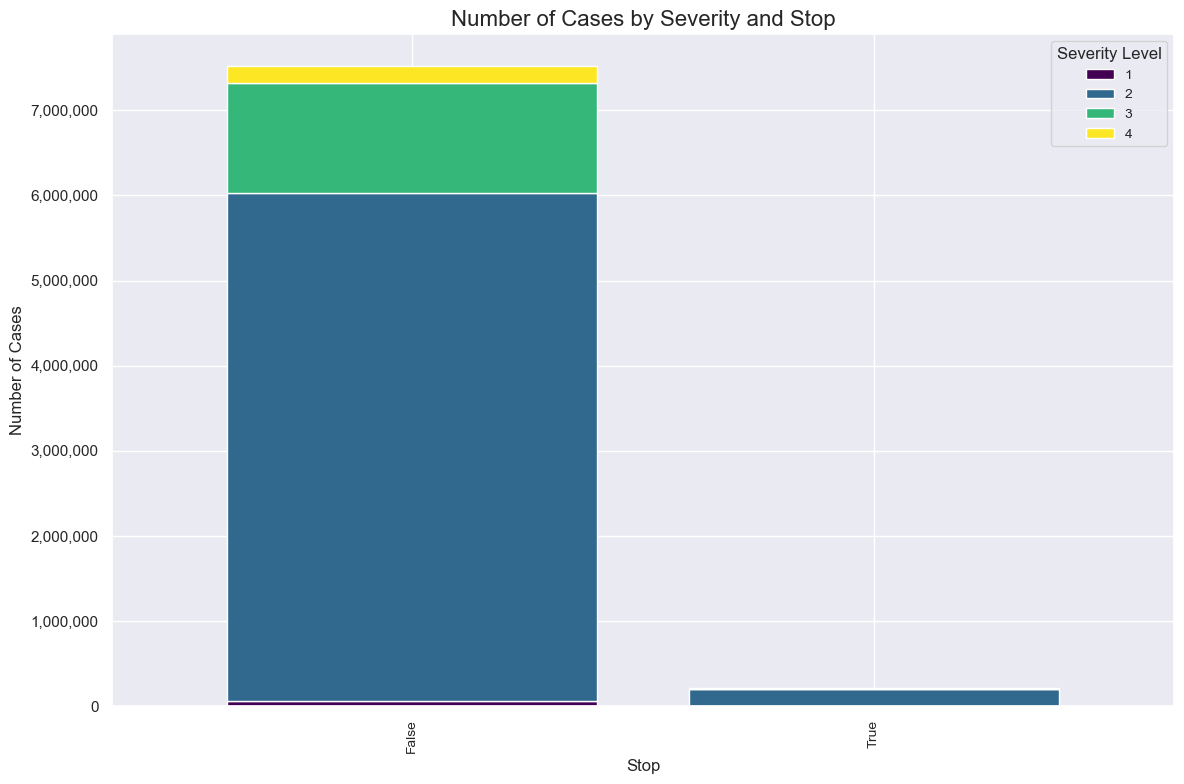

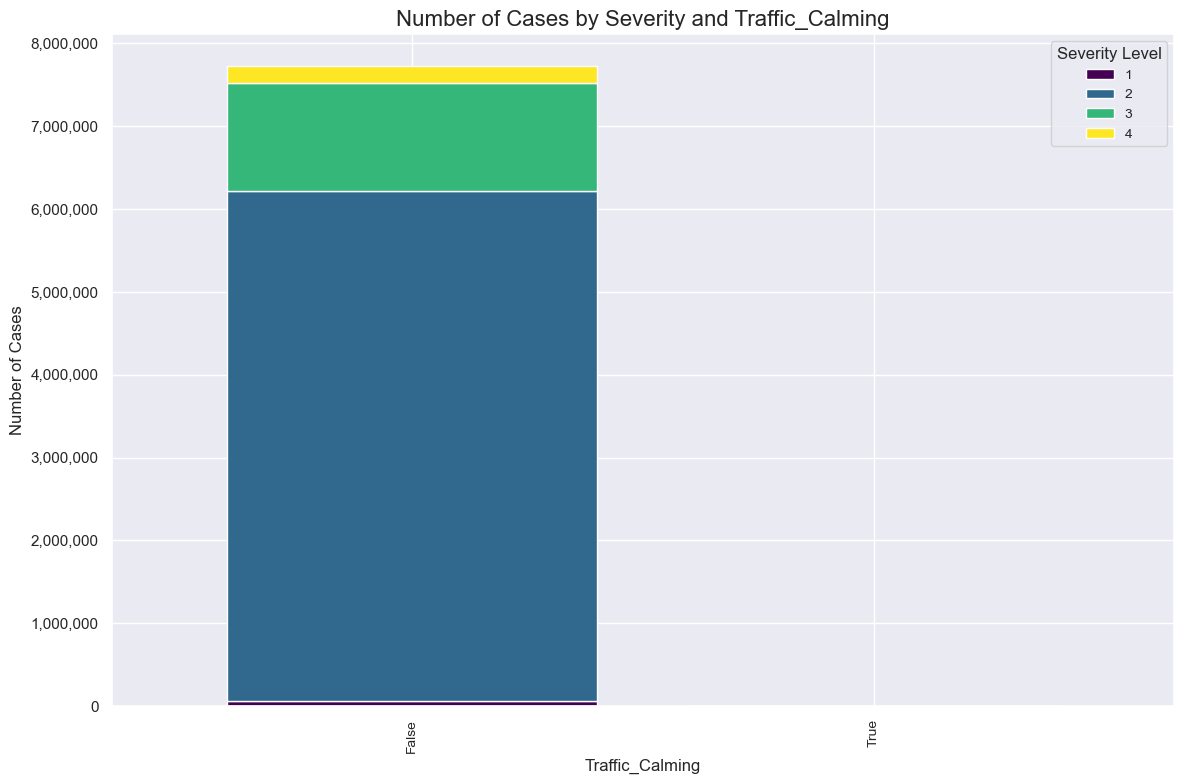

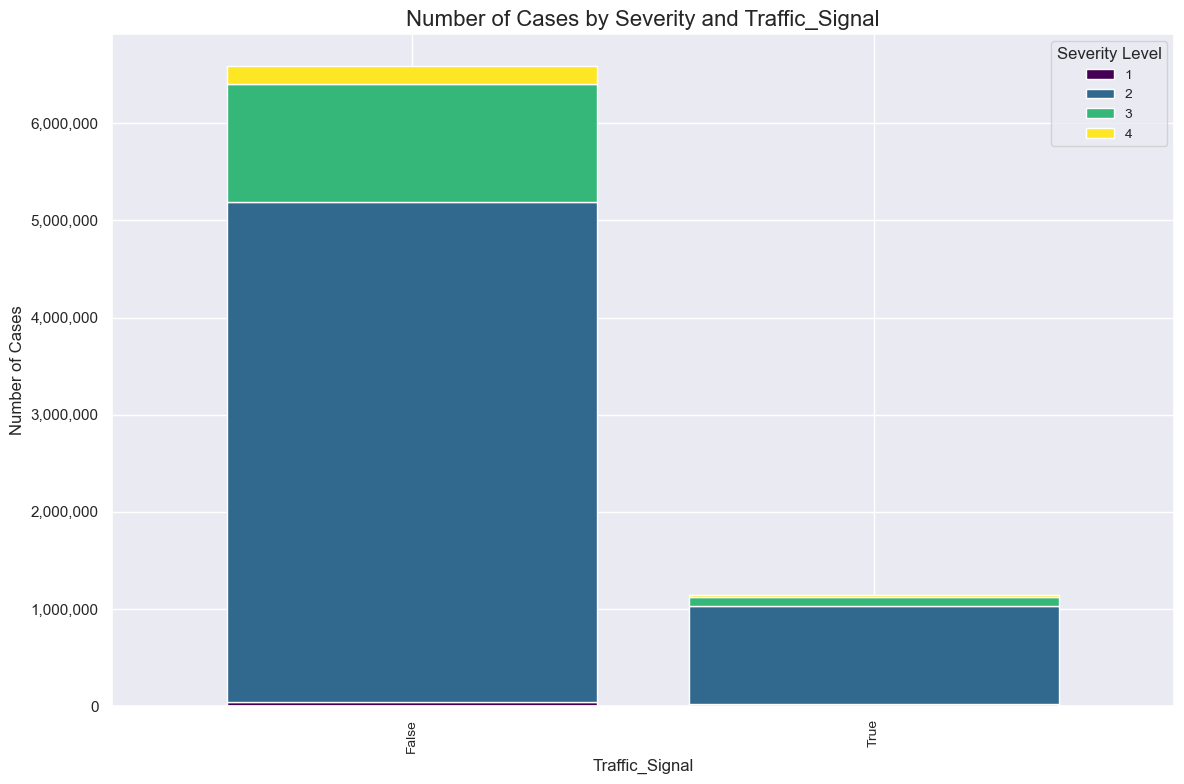

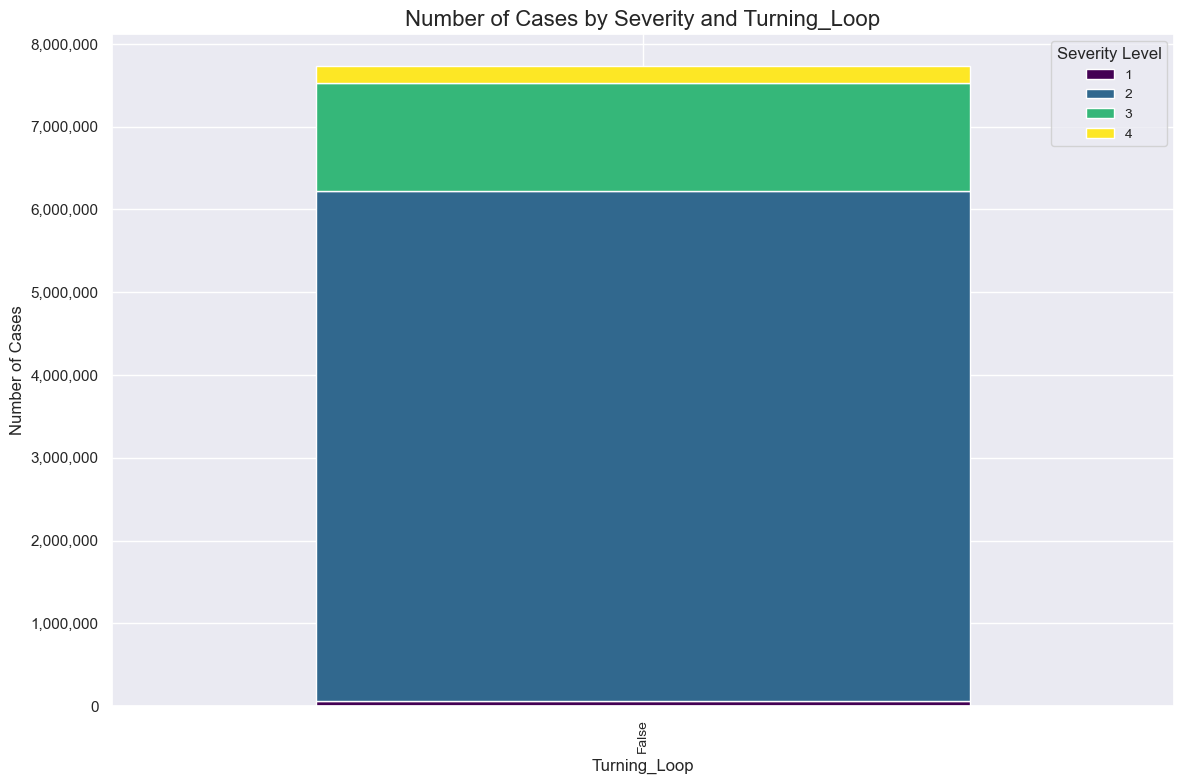

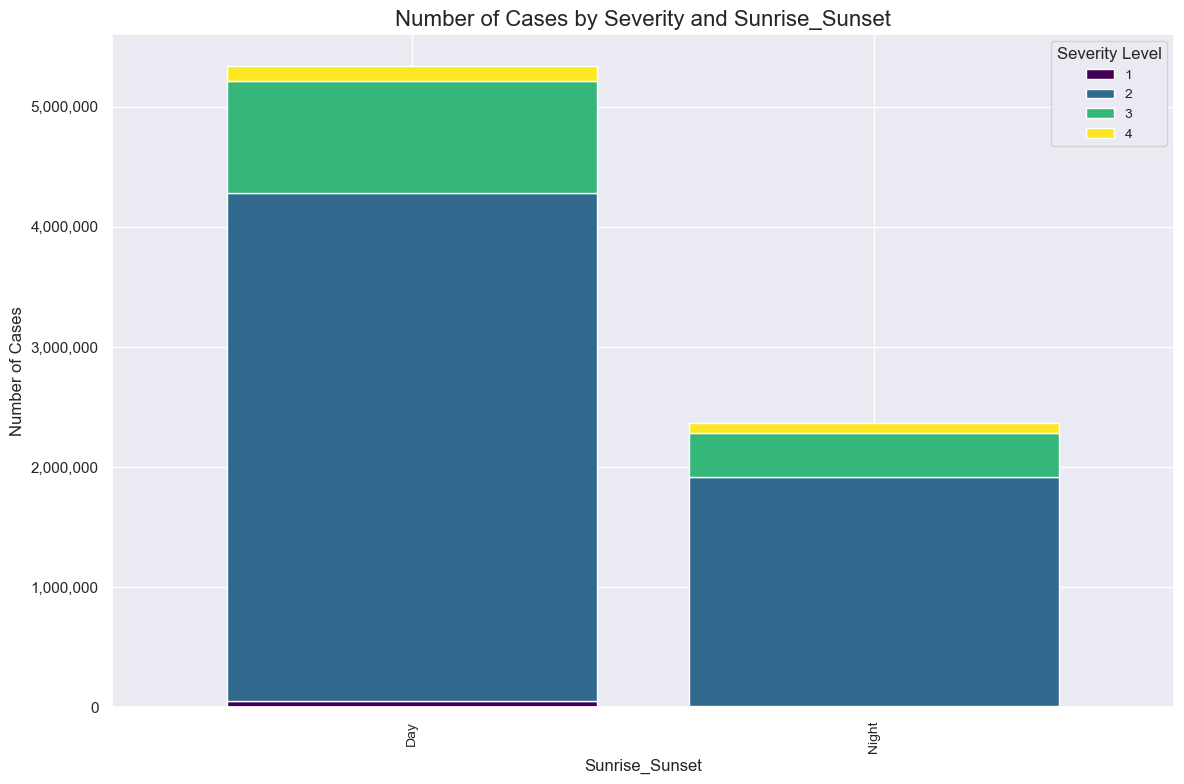

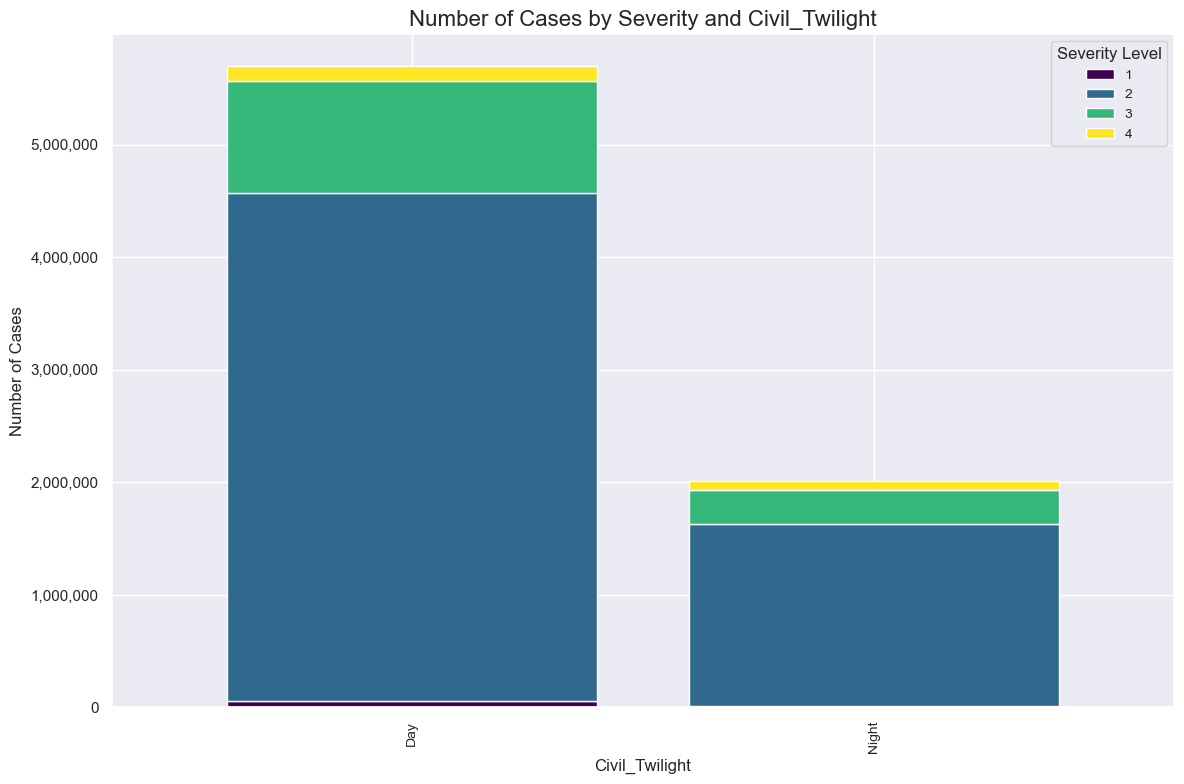

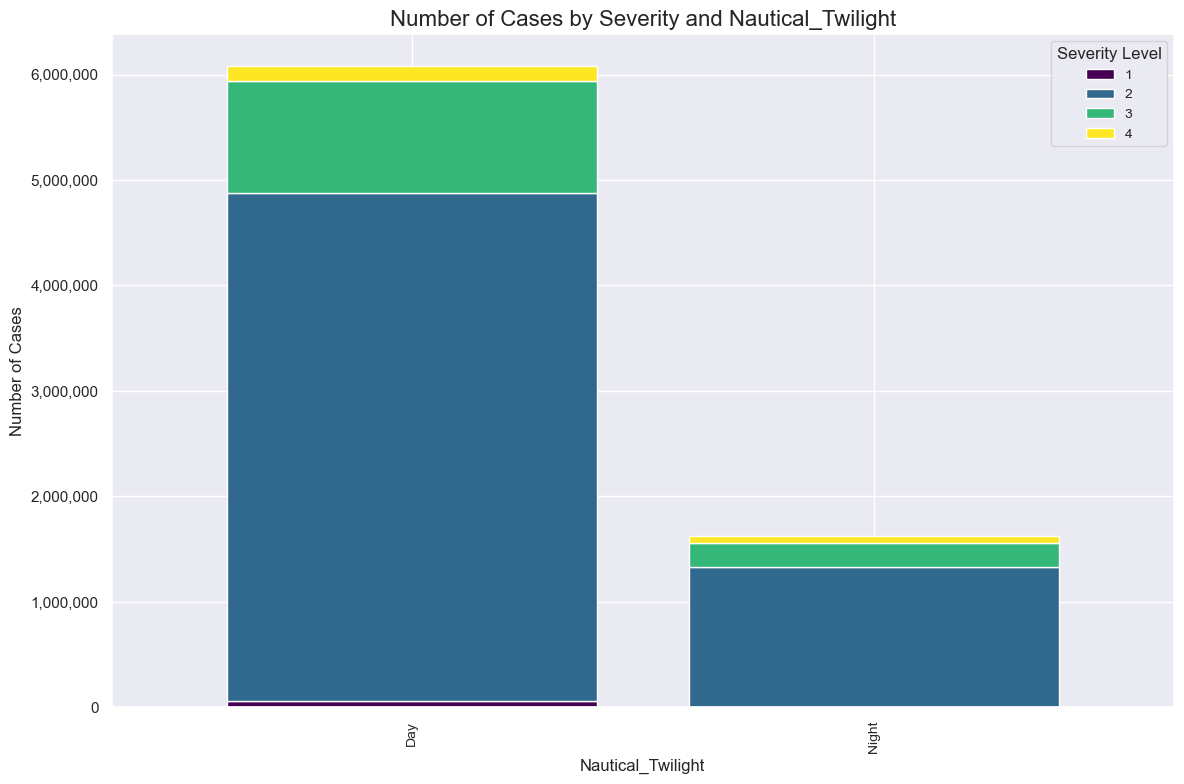

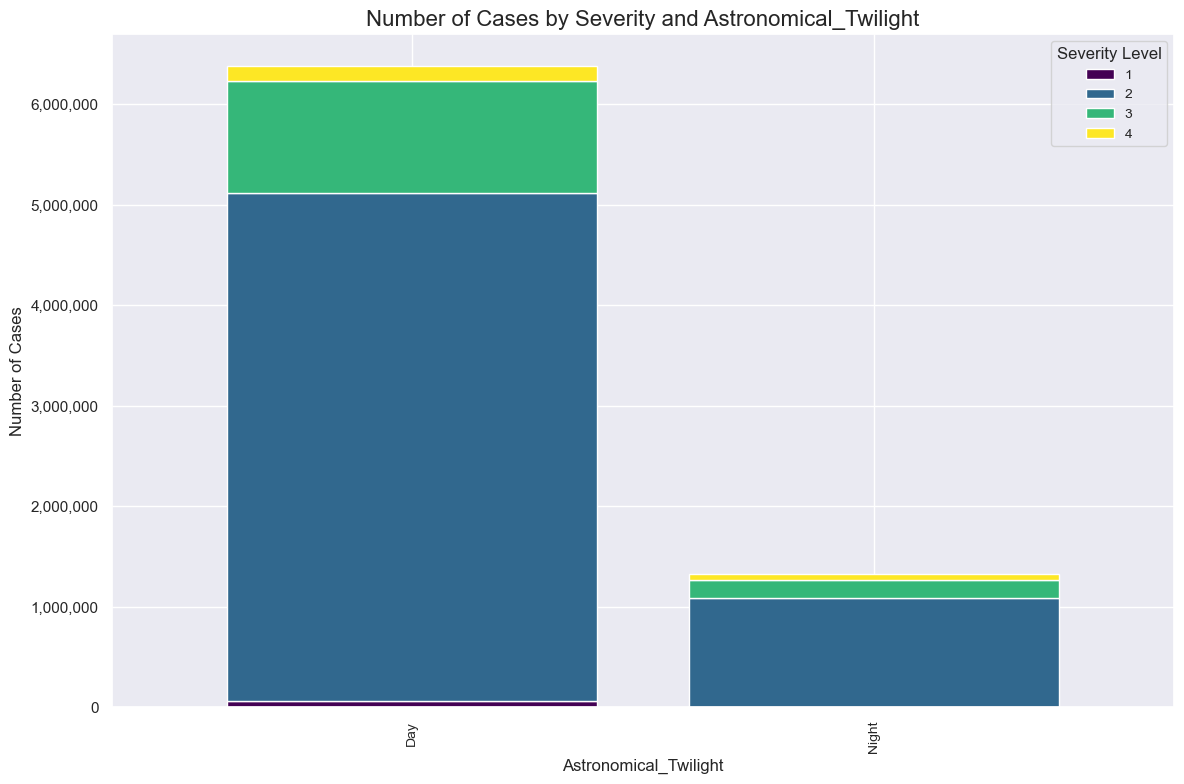

In [16]:
columns_to_plot = ['Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'] 

for column in columns_to_plot: plot_severity_distribution(df, group_by_column=column, top_n=30);

The plots of the data shows that many accidents happened in areas where important road features like bumps, crossings, give-ways, junctions, exits, traffic calming, and traffic signals were missing. This could be a major reason for the high number of incidents, especially in cities like Los Angeles and states like California and Texas, which report a lot of accidents. The lack of these safety features, such as traffic signals and traffic calming, might be making the roads more dangerous. To reduce accidents, it’s important for authorities to improve road infrastructure by adding these missing elements. This could help lower the number of accidents and make the roads safer for everyone.

In [17]:
df['Start_Time'] = df['Start_Time'].str.replace(r'\.\d+$', '', regex=True) # removes the fractional seconds (.000000000)
df['End_Time'] = df['End_Time'].str.replace(r'\.\d+$', '', regex=True) 

df['Start_Time'] = pd.to_datetime(df['Start_Time']) 
df['End_Time'] = pd.to_datetime(df['End_Time'])

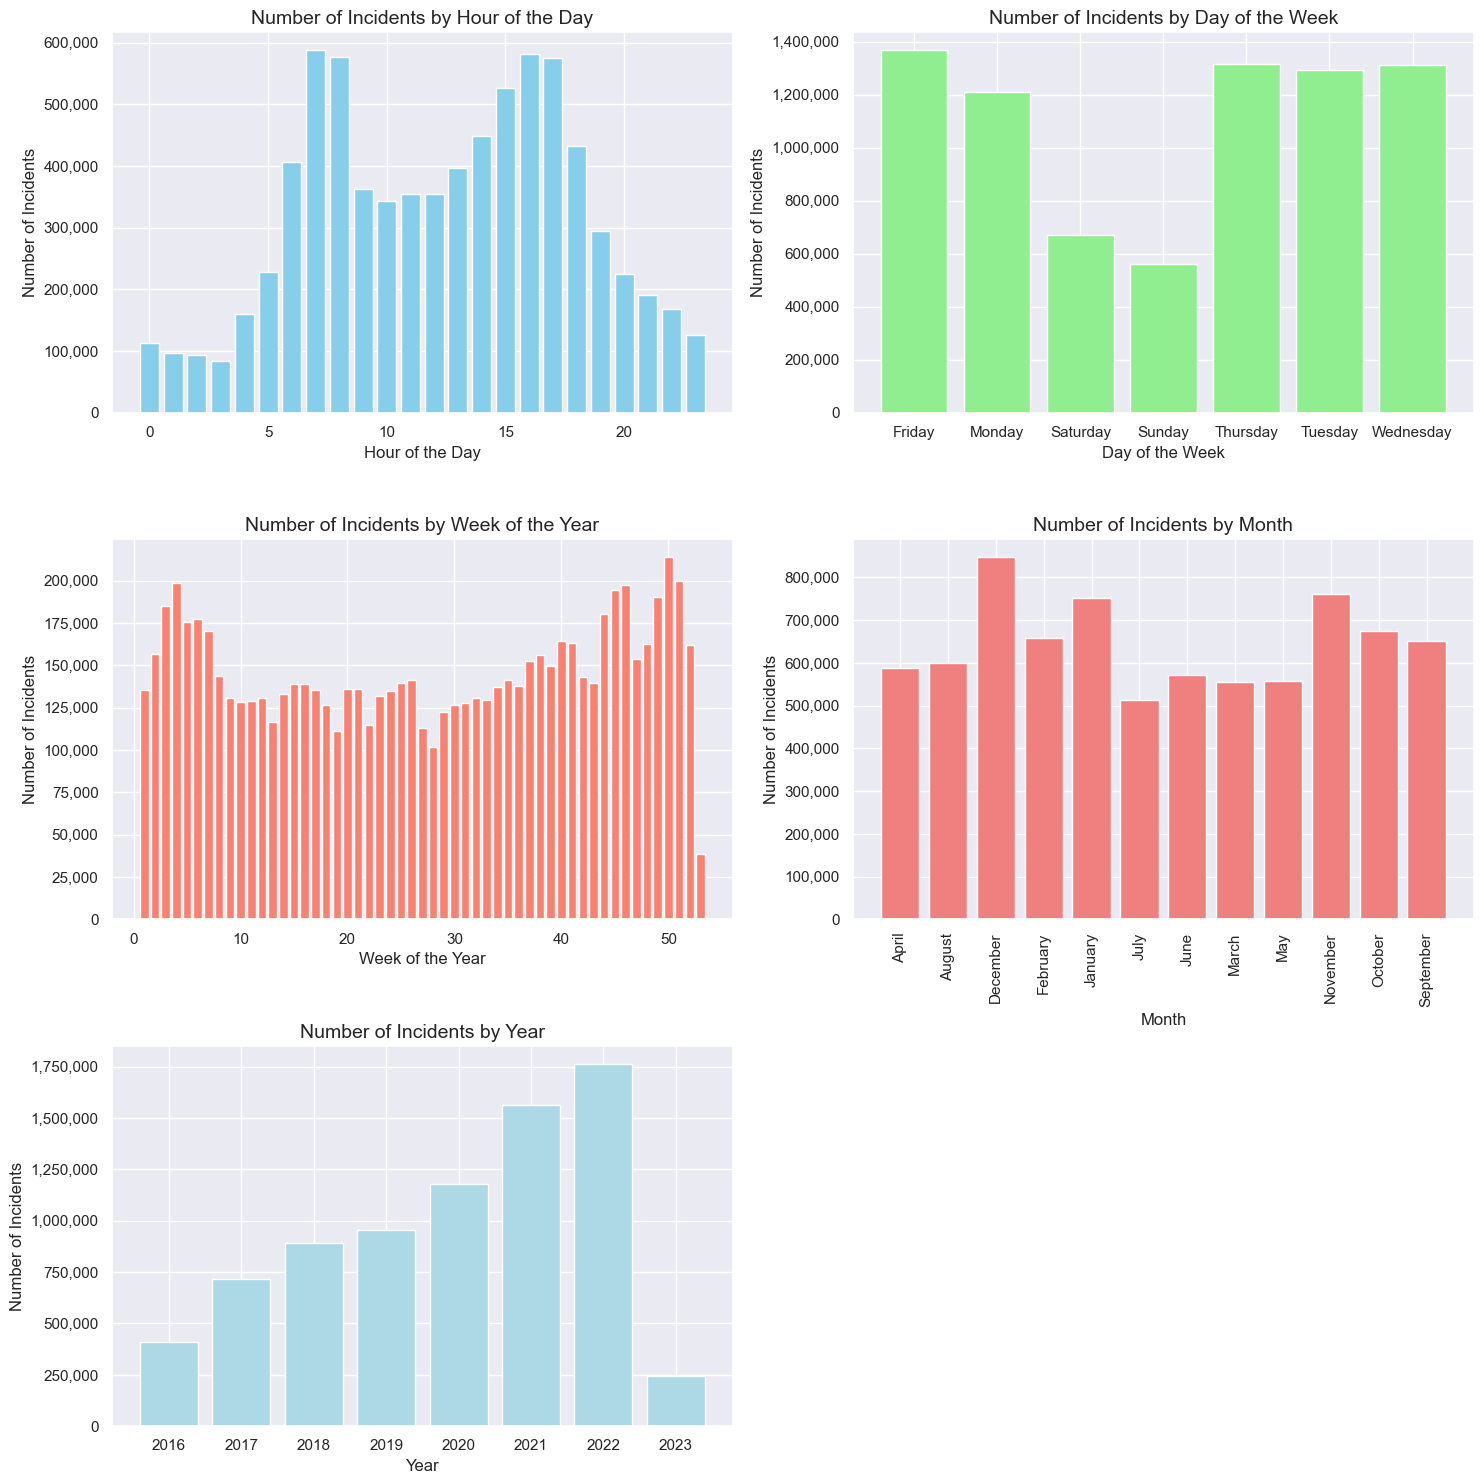

In [18]:
import matplotlib.ticker as ticker

incident_counts_by_time = df['Start_Time'].dt.hour.value_counts().sort_index()
incident_counts_by_day = df['Start_Time'].dt.day_name().value_counts().sort_index()
incident_counts_by_week = df['Start_Time'].dt.isocalendar().week.value_counts().sort_index()
incident_counts_by_month = df['Start_Time'].dt.month_name().value_counts().sort_index()
incident_counts_by_year = df['Start_Time'].dt.year.value_counts().sort_index()

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].bar(incident_counts_by_time.index, incident_counts_by_time.values, color='skyblue')
axs[0, 0].set_title('Number of Incidents by Hour of the Day', fontsize=14)
axs[0, 0].set_xlabel('Hour of the Day', fontsize=12)
axs[0, 0].set_ylabel('Number of Incidents', fontsize=12)

axs[0, 1].bar(incident_counts_by_day.index, incident_counts_by_day.values, color='lightgreen')
axs[0, 1].set_title('Number of Incidents by Day of the Week', fontsize=14)
axs[0, 1].set_xlabel('Day of the Week', fontsize=12)
axs[0, 1].set_ylabel('Number of Incidents', fontsize=12)

axs[1, 0].bar(incident_counts_by_week.index.astype(int), incident_counts_by_week.values, color='salmon')
axs[1, 0].set_title('Number of Incidents by Week of the Year', fontsize=14)
axs[1, 0].set_xlabel('Week of the Year', fontsize=12)
axs[1, 0].set_ylabel('Number of Incidents', fontsize=12)

axs[1, 1].bar(incident_counts_by_month.index, incident_counts_by_month.values, color='lightcoral')
axs[1, 1].set_title('Number of Incidents by Month', fontsize=14)
axs[1, 1].set_xlabel('Month', fontsize=12) 
axs[1, 1].set_ylabel('Number of Incidents', fontsize=12)
axs[1, 1].tick_params(axis='x', labelrotation=90)

axs[2, 0].bar(incident_counts_by_year.index, incident_counts_by_year.values, color='lightblue')
axs[2, 0].set_title('Number of Incidents by Year', fontsize=14)
axs[2, 0].set_xlabel('Year', fontsize=12)
axs[2, 0].set_ylabel('Number of Incidents', fontsize=12)

axs[2, 1].axis('off')

for ax in axs.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

Based on the plots:

1. Most incidents happen on weekdays and during busy commute hours: A large number of accidents are occurring on working days, especially during peak hours when people are traveling to and from work. This suggests that heavy traffic and congestion during these times are likely contributing to the higher number of incidents. Improving traffic management and road safety during these rush hours could help reduce accidents.
2. The number of incidents is rising each year: We can see an increase in incidents over the years, which is concerning. This points to the fact that despite efforts to improve road safety, the core issues might not be getting addressed properly. This upward trend suggests that either infrastructure improvements are lacking, or existing measures aren’t being enforced effectively. As I pointed out eariler that infrastructure absence had higher number cases. We can now confidently say that this is the root issue. 

In [19]:
import plotly.express as px

state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Incident_Count'] 

fig = px.choropleth(
    state_counts,
    locations='State',            
    locationmode='USA-states',    
    color='Incident_Count',      
    scope='usa',           
    title='Number of Incidents by State',
    color_continuous_scale='Blues'
)

fig.show()
fig.write_html('plotly.html')

## Dealing With Missing Values

In [20]:
import plotly.express as px

state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Incident_Count'] 

fig = px.choropleth(
    state_counts,
    locations='State',            
    locationmode='USA-states',    
    color='Incident_Count',      
    scope='usa',           
    title='Number of Incidents by State',
    color_continuous_scale='Blues'
)

fig.show()
fig.write_html('partial_plotly.html', full_html=False, include_plotlyjs=False)

In [21]:
df.isna().sum() 

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [22]:
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage.sort_values(ascending=False)) 

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [23]:
df.drop(columns=['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)'], inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 42 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      object        
 18  Temperature(F)        

In [25]:
numerical_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True) 

C:\Users\muska\AppData\Local\Temp\ipykernel_12408\710646423.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [26]:
categorical_cols = ['Weather_Condition', 'Wind_Direction', 'Timezone', 'Sunrise_Sunset', 'Airport_Code']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\muska\AppData\Local\Temp\ipykernel_12408\828068154.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [27]:
# due to sequential nature, I have used forward fill
df['Weather_Timestamp'].ffill(inplace=True) 

# categorical columns
twilight_cols = ['Nautical_Twilight', 'Civil_Twilight', 'Astronomical_Twilight']
for col in twilight_cols:
    # Use mode() to fill missing values for categorical columns
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\muska\AppData\Local\Temp\ipykernel_12408\3573058554.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\muska\AppData\Local\Temp\ipykernel_12408\3573058554.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [28]:
df.dropna(subset=['Description', 'Street', 'City', 'Zipcode', 'Timezone'], inplace=True) # dropping missing rows

In [29]:
df.isna().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

## Feature Engineering & Data Preprocessing

In [30]:
df['Hour_of_day'] = df['Start_Time'].dt.hour  # to capture patterns related to specific days.
df['Day_of_week'] = df['Start_Time'].dt.dayofweek  # to account for patterns based on time of day
df['Month'] = df['Start_Time'].dt.month #  to capture seasonal variations if any 
df['Is_Weekend'] = df['Day_of_week'].isin([5, 6]).astype(int) # binary feature to see if accidents are more severe on weekends

In [31]:
weather_mapping = {
    'Clear': 'Clear/Good Weather',
    'Fair': 'Clear/Good Weather',
    'Mostly Cloudy': 'Cloudy',
    'Cloudy': 'Cloudy',
    'Partly Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'LightRain': 'Rainy',
    'Scatter Clouds': 'Cloudy',
    'Light Snow': 'Snowy',
    'Fog': 'Foggy/Hazy',
    'Rain': 'Rainy',
    'Haze': 'Foggy/Hazy',
    'Fair/Windy': 'Clear/Good Weather',
    'Heavy Rain': 'Rainy',
    'Light Drizzle': 'Rainy',
    'Thunder in the Vicinity': 'Thunderstorm'
}

df['Weather_Condition'] = df['Weather_Condition'].map(weather_mapping)

df['Weather_Condition'].unique() 

array([nan, 'Cloudy', 'Rainy', 'Snowy', 'Foggy/Hazy',
       'Clear/Good Weather', 'Thunderstorm'], dtype=object)

In [32]:
df['Is_Complex_Road'] = df[['Junction', 'Railway', 'Crossing']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0) 
df['Traffic_Signal'] = df['Traffic_Signal'].astype(int) 
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].apply(lambda x: 1 if x == 'Day' else 0) 
df['Civil_Twilight'] = df['Civil_Twilight'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Nautical_Twilight'] = df['Nautical_Twilight'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Astronomical_Twilight'] = df['Astronomical_Twilight'].apply(lambda x: 1 if x == 'Yes' else 0) 

In [33]:
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()  
df['Duration'] = np.log1p(df['Duration'])
correlation = df[['Duration', 'Severity']].corr()
print(correlation) 

          Duration  Severity
Duration  1.000000 -0.080485
Severity -0.080485  1.000000


Linear Relationship is weak but we can still keep it because there might be no

In [34]:
df['Weather_Condition'].fillna('Unknown', inplace=True) 

C:\Users\muska\AppData\Local\Temp\ipykernel_12408\1638028337.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [35]:
columns_to_drop = ["ID", "Source",'Description', 'Start_Time', 'End_Time', 'Weather_Timestamp', 'Timezone', 'Airport_Code']
df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour_of_day', 'Day_of_week', 'Month',
       'Is_Weekend', 'Is_Complex_Road', 'Duration'],
      dtype='object')

In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7715355 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Lat              float64
 2   Start_Lng              float64
 3   Distance(mi)           float64
 4   Street                 object 
 5   City                   object 
 6   County                 object 
 7   State                  object 
 8   Zipcode                object 
 9   Country                object 
 10  Temperature(F)         float64
 11  Humidity(%)            float64
 12  Pressure(in)           float64
 13  Visibility(mi)         float64
 14  Wind_Direction         object 
 15  Wind_Speed(mph)        float64
 16  Weather_Condition      object 
 17  Amenity                bool   
 18  Bump                   bool   
 19  Crossing               bool   
 20  Give_Way               bool   
 21  Junction               bool   
 22  No_Exit                

In [37]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Weather_Condition', 'Wind_Direction'], drop_first=True)
df_encoded.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,...,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West
0,3,39.865147,-84.058723,0.01,I-70 E,Dayton,Montgomery,OH,45424,US,...,False,False,False,False,False,False,False,False,False,False
1,2,39.928059,-82.831184,0.01,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,...,False,False,False,False,False,False,False,False,False,False
2,2,39.063148,-84.032608,0.01,State Route 32,Williamsburg,Clermont,OH,45176,US,...,False,False,True,False,False,False,False,False,False,False
3,3,39.747753,-84.205582,0.01,I-75 S,Dayton,Montgomery,OH,45417,US,...,False,False,True,False,False,False,False,False,False,False
4,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,...,False,False,True,False,False,False,False,False,False,False


In [38]:
df_encoded = df_encoded.drop(columns=['City', 'Zipcode', 'Street', 'State', 'Country']) 

In [39]:
df_encoded.drop(columns=['County'] , inplace = True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7715355 entries, 0 to 7728393
Data columns (total 61 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Severity                        int64  
 1   Start_Lat                       float64
 2   Start_Lng                       float64
 3   Distance(mi)                    float64
 4   Temperature(F)                  float64
 5   Humidity(%)                     float64
 6   Pressure(in)                    float64
 7   Visibility(mi)                  float64
 8   Wind_Speed(mph)                 float64
 9   Amenity                         bool   
 10  Bump                            bool   
 11  Crossing                        bool   
 12  Give_Way                        bool   
 13  Junction                        bool   
 14  No_Exit                         bool   
 15  Railway                         bool   
 16  Roundabout                      bool   
 17  Station                         

In [40]:
df_encoded["Severity"].value_counts() 

Severity
2    6145911
3    1298146
4     204078
1      67220
Name: count, dtype: int64

In [41]:
min_class_count = df_encoded["Severity"].value_counts().min()

# undersampling the classes to match the minimum count and to prevent memory error 
df_final = df_encoded.groupby('Severity').apply(lambda x: x.sample(n=min_class_count, random_state=42))
df_final = df_final.reset_index(drop=True)
# shuffling
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

df_final['Severity'].value_counts() 

C:\Users\muska\AppData\Local\Temp\ipykernel_12408\3929462405.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Severity
4    67220
3    67220
1    67220
2    67220
Name: count, dtype: int64

## Preparing Our Data For The Model

In [42]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['Severity'])
y = df_final['Severity']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp)  # 0.4 * 25% = 10%

print(f"Training Set Size: {len(X_train)}")
print(f"Validation Set Size: {len(X_val)}")
print(f"Test Set Size: {len(X_test)}") 

Training Set Size: 201660
Validation Set Size: 40332
Test Set Size: 26888


In [43]:
X_train.head()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,...,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West
37391,36.985184,-122.023333,0.277,44.0,96.0,30.02,10.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
201523,37.850998,-122.299454,0.000,72.0,57.0,30.01,10.0,26.0,False,False,...,False,False,False,False,False,False,True,False,False,False
20340,34.003582,-81.110245,0.000,81.0,30.0,29.66,10.0,12.0,False,False,...,False,False,True,False,False,False,False,False,False,False
84362,31.678314,-106.316864,0.000,82.0,7.0,29.89,10.0,11.5,False,False,...,False,True,False,False,False,False,False,False,False,False
90299,40.256161,-75.501778,0.000,36.0,52.0,29.79,10.0,14.0,False,False,...,False,False,False,False,False,False,False,False,False,False


## Training Our Model

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_val)

print("RFC Accuracy:", accuracy_score(y_val, rf_predictions))
print("Classification Report:")
print(classification_report(y_val, rf_predictions)) 

RFC Accuracy: 0.7614053357135773
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.93      0.89     10083
           2       0.74      0.53      0.62     10083
           3       0.73      0.73      0.73     10083
           4       0.72      0.86      0.78     10083

    accuracy                           0.76     40332
   macro avg       0.76      0.76      0.75     40332
weighted avg       0.76      0.76      0.75     40332



In [45]:
!pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 1.5 MB/s eta 0:00:00


In [1]:
import shap

# Create SHAP TreeExplainer
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for validation data
shap_values = explainer.shap_values(X_val)

# Plot SHAP summary for one class (e.g., class 0)
shap.summary_plot(shap_values[0], X_val, plot_type="bar")


NameError: name 'rf_model' is not defined

## Final Predition On Test Data

In [ ]:
y_test = y_test + 1
y_test_pred = random_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
0.7999851234751562


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.93      0.91      6722
           2       0.77      0.65      0.70      6722
           3       0.77      0.78      0.77      6722
           4       0.78      0.84      0.81      6722

    accuracy                           0.80     26888
   macro avg       0.80      0.80      0.80     26888
weighted avg       0.80      0.80      0.80     26888



The model has achieved an overall accuracy of 79%, which is a reasonably good performance but not the best I believe the reason was the undersampling. 

1. Class 1: The model performs well on this class with a precision of 0.87, recall of 0.93, and f1-score of 0.90. This suggests that it correctly identifies class 1 most of the time and misses very few instances.
2. On Class 2 model shows moderate performance because it is struggling with recall.
3. on Class 3 model performance is balanced as all values are almost the same.
4. On class 4 model perfrmance similar to on class 1 but there is more room for improvement.

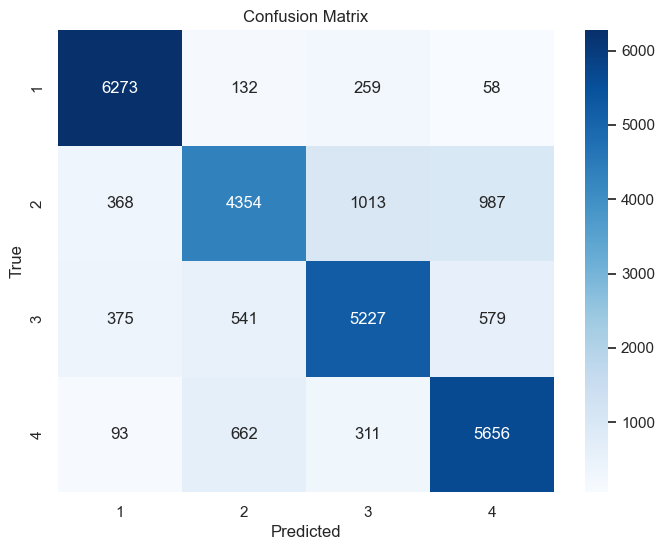

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 

The model is performing fairly well overall, with good accuracy across all classes instances of class 2 are more prone to misclassification as we can see above. 

## Conclusion 

Based on the analysis, the main issue for accidents is insufficient infrastructure. Governement should look into such issues. While the model is performing decently, there are areas for improvement. The significant challenge I encountered was the lack of sufficient data for some of the less frequent classes. This caused me to undersample certain data points, which in turn impacted the model's ability to learn effectively. The undersampling was also necessary due to resource constraints on Google's platform, as it led to memory issues when trying to process the full dataset.

Despite these challenges, the model has still managed to achieve an accuracy of around 80%. Considering the unpredictable nature of accidents on roads, this result is quite good, but there’s definitely room for improvement.  

1. Collecting more data for rare cases in the dataset may further improve the performance
2. I could not train the model on entire dataset due to resouce usage, maybe that can help improve further
3. While the final model is able to achieve 80% accuracy, one can also try to experiment with params, n_iter, and cv like hyperparamaters during fine tuning as I used only less number due to resource usage.
